# Введение


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков»

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Нужно посмотреть самые популярные жанры и платформы
План иследования
1. Провести предобработку данных
2. Ислледовательский анализ 
3. Выводы 

## 1.Знакомство с данными 

In [19]:
import pandas as pd

In [20]:
import numpy as np

In [21]:
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

In [23]:
import seaborn as sns

In [24]:
plt.rcParams.update({'figure.max_open_warning': 0})

In [25]:
from scipy import stats as st

In [26]:
df = pd.read_csv('games.csv')

In [27]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


1. Name — название игры
2. Platform — платформа
3. Year_of_Release — год выпуска
4. Genre — жанр игры
5. NA_sales — продажи в Северной Америке (миллионы проданных копий)
6. EU_sales — продажи в Европе (миллионы проданных копий)
7. JP_sales — продажи в Японии (миллионы проданных копий)
8. Other_sales — продажи в других странах (миллионы проданных копий)
9. Critic_Score — оценка критиков (максимум 100)
10. User_Score — оценка пользователей (максимум 10)
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Так видим пару пропусков в Name, Year_of_Release,Genre,Critic_Score,User_Score,Rating

In [29]:
#df = df.drop(columns=['Unnamed: 0'],axis = 1)

Удалим столбец Unnamed: 0 - в нем было копирование индексов 

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [31]:
df.columns = df.columns.str.lower()
#приведем все к нижнему регистру 

In [32]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [33]:
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Посмотрим на уникальные значения в рейтинге и оценках 

In [34]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Кол-во пропущенных значений 

In [35]:
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [36]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [37]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [38]:
df[df['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [39]:
df[df['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [40]:
df[df['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотел на пропущенные значения, ни один из них мы адевактно заполнить не сможем, удалять не будем так как это большой процент датасета, заполним маркерными значениями скроее всего 
1. name - нет адекватно варианта замены 
2. year_of_release - пропущенно не так много медианой или средним не заполнить оставим как есть или заполним маркерным 
3. genre - можно попробывать загуглить и заполнить )
4. critic_score - возможно это игры не оценивали критики, заполнять медианой или средним мы не можем  (возьму опыт с прошлых проектов, и скорее всего заполню значениями -1, чтоб не перемешать)
5. user_score скорее всего такая же проблема как с оценками критиков 
6. rating заменим на no_ESRB

## 2. Подготовка данных

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [42]:
#df['name'] = df['name'].fillna('unknown')
df['name'] = df['name'].dropna()

Заменим пропущенные в name значения на unknown

In [43]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

Переведем формат из float в Int64 пытался сделать в dtime но из-за nan это не получилось, заполнять маркерными значения не вижу смысла так как 1% процент данных не будет учтен 

In [44]:
#df['genre'] = df['genre'].fillna('unknown')
df['genre'] = df['genre'].dropna()

In [45]:
df['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [46]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN.</font>

Гугл дает подсказу что tbd это когда оценок слишком мало по факту это и есть nan заменим на nan и теперь сможем сменить тип данных на float 

In [47]:
df['user_score'] = df['user_score'].fillna(-1)

In [48]:
df['critic_score'] = df['critic_score'].fillna(-1)

Заполним пропуски в critic_score и user_score маркерным значением -1 для того, чтобы не исказить данные оценок 

In [49]:
#df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'] = df['rating'].fillna(-1)
df['rating'].isna().sum()
df['rating'].value_counts()

-1      6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

 В столбце рейтинг компьютерной игры,заменим категорию K-A на Е, т.к по сути это одно и тоже.Заменим так же пропущенные значения на не типичные (-1), что бы не потерять данные.

In [50]:
df.isna().sum()

name                 2
platform             0
year_of_release    269
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

Так теперь с пропусками почти порядок ) 

In [51]:
df['total_cost'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

Посчитаем общую выручку по кажой игре 

In [52]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_cost
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38


### 2.1 Итог по первой главе

1. Избавились от пропусков где это было уместно, в части поставили маркерные значения -1, по поводу припроды пропусков чаще всего эти игры не оценивали или оценок было недостаточно
2. Посчитали общую сумму по играм 
3. Преоброзовали типы данных из object в float и int для удобства рассчетов 

In [53]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_cost       16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB
None
-------------------------
name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
name : ко

In [54]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_cost
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,-1.0,-1.0,-1,3.00
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,-1.0,-1.0,-1,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,-1.0,E10+,0.01
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,-1.0,-1.0,-1,0.01


In [55]:
df['year_of_release'] = df['year_of_release'].dropna()

## 3 Исследовательский анализ данных

In [56]:
year_game = df.pivot_table(index=['year_of_release'],values='total_cost',aggfunc='count')


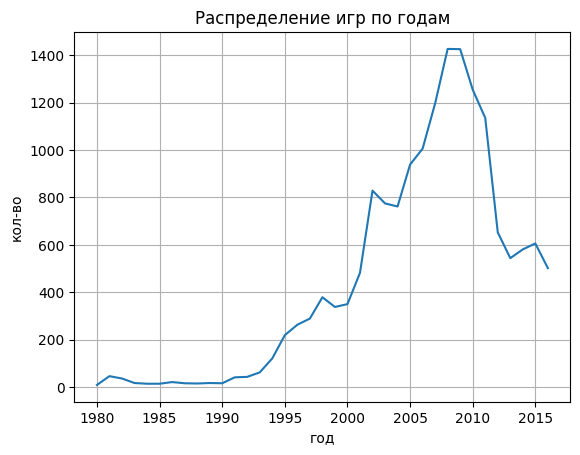

In [57]:
plt.plot(year_game)
plt.title("Распределение игр по годам")
plt.xlabel("год")
plt.ylabel("кол-во")
plt.grid(True)

На гарфике мы видим что с 1980 по 1995 особо много игр не выпускали, это вроде времена MSDOS а вот с 2000  уже пошло развитие индустрии варкрафт 2 и 3) Пик у нас с 2002 по 2010 далее спад, думаю актуальные данные будут с 2010 по 2015 год 

In [58]:
platform_year = df.pivot_table(index=['platform'],values='total_cost',aggfunc='sum').sort_values(
    by='total_cost', ascending=False)

Text(0, 0.5, 'Количество продаж')

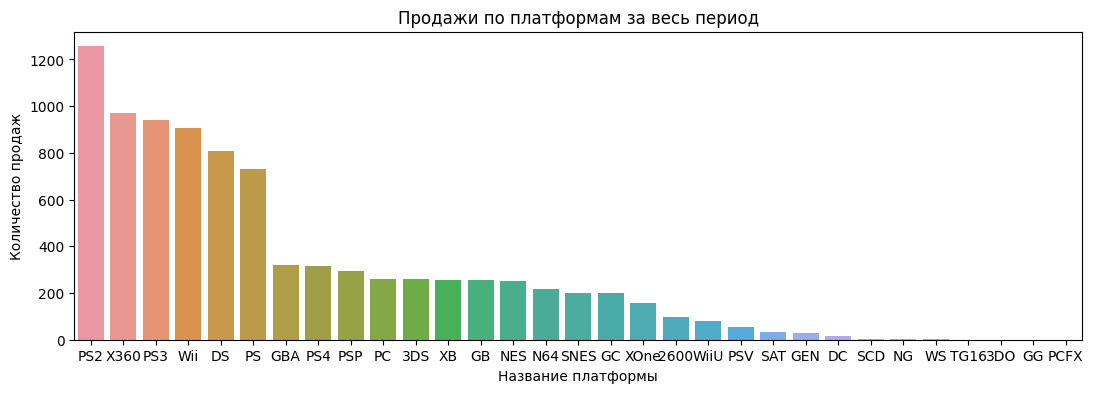

In [59]:
plt.figure(figsize=(13,4))
sns.barplot(x=platform_year.index,y=platform_year['total_cost'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

По графику видим, что самые поплуярные у нас это приствки, пк не так популярен, лидируют у нас PS XBOX Wii и как то страноо DS не слышал о ней 
6 самых популярных это PS2 X360 PS3 Wii DS PS 

In [60]:
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [61]:
platform_grouped = platform_year.reset_index()

In [62]:
#Составим список всех платформ.
top_platforms_list = platform_grouped['platform'].unique()
top_platforms_list

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC',
       '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600',
       'WiiU', 'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

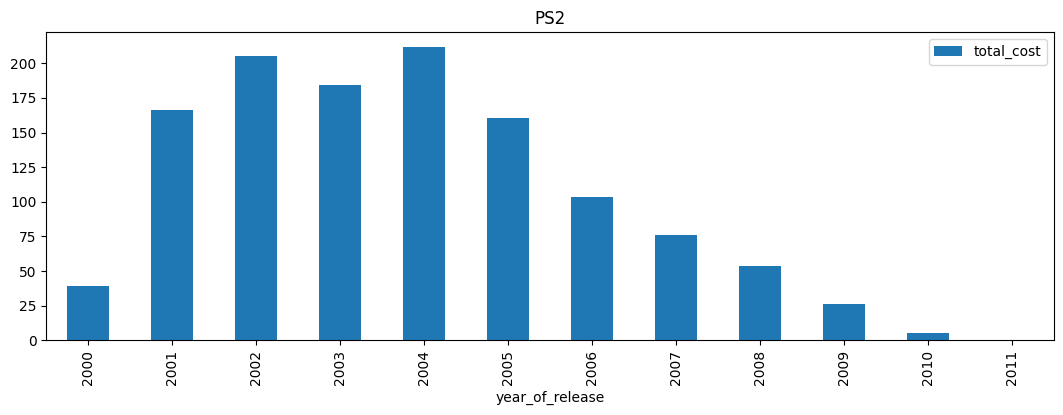

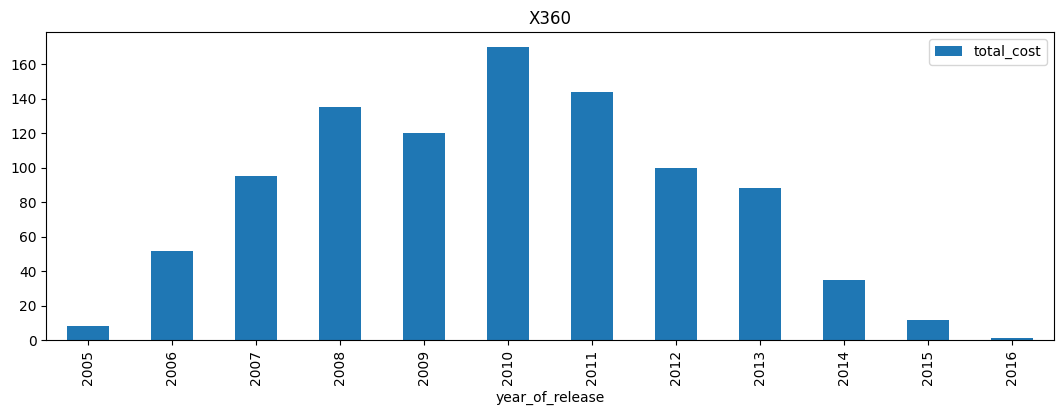

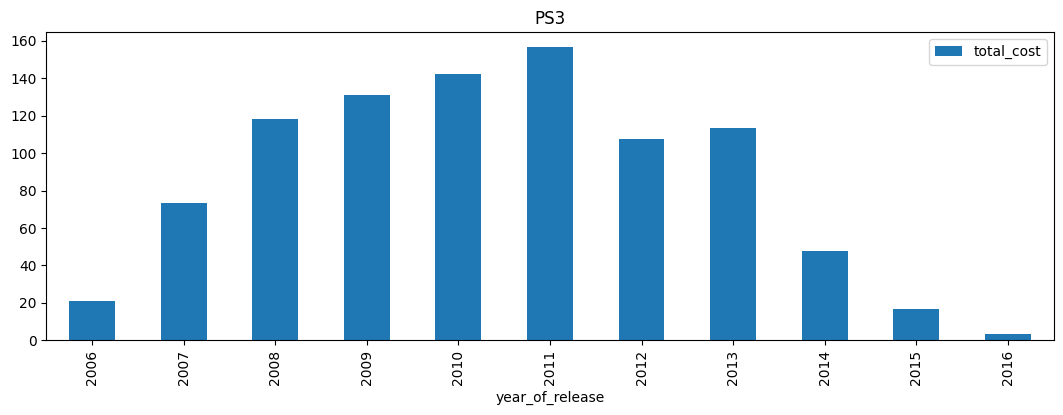

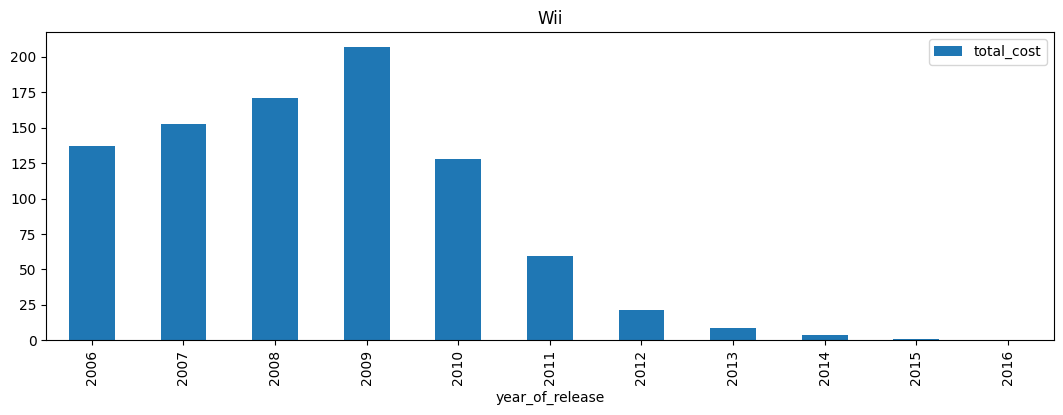

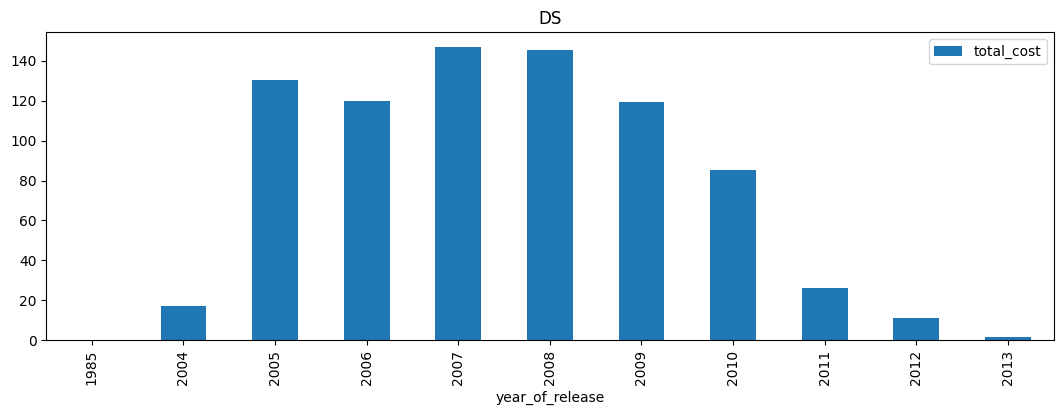

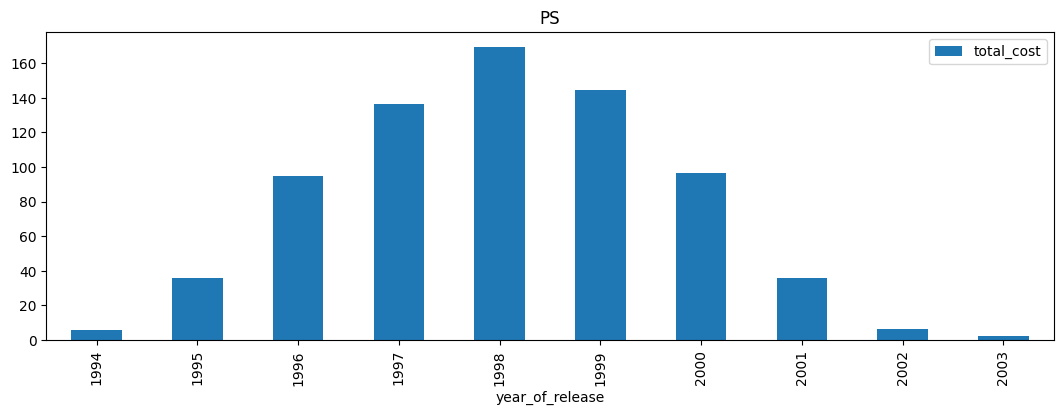

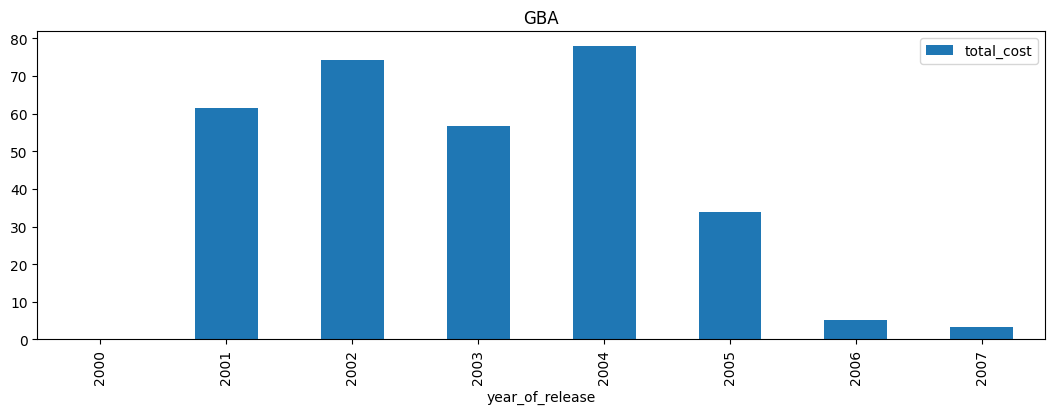

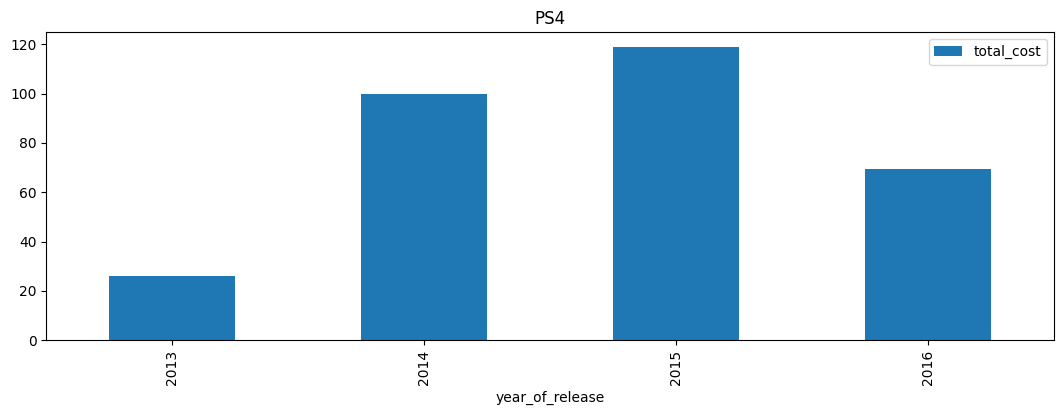

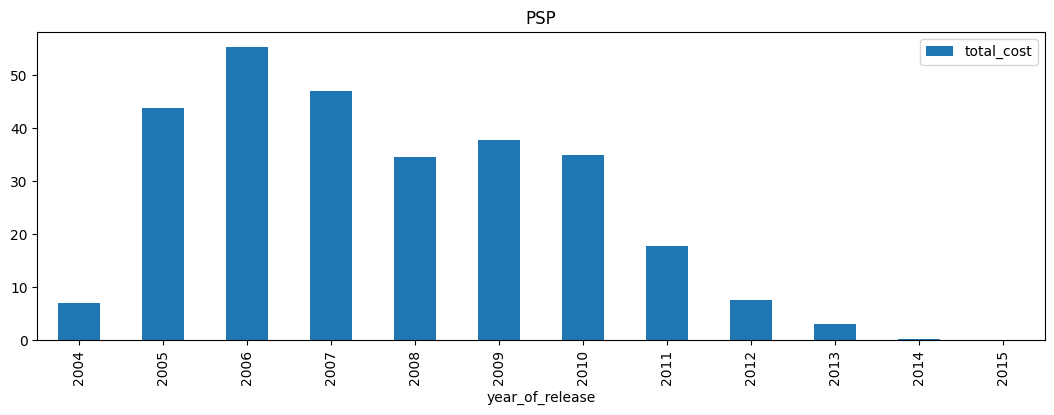

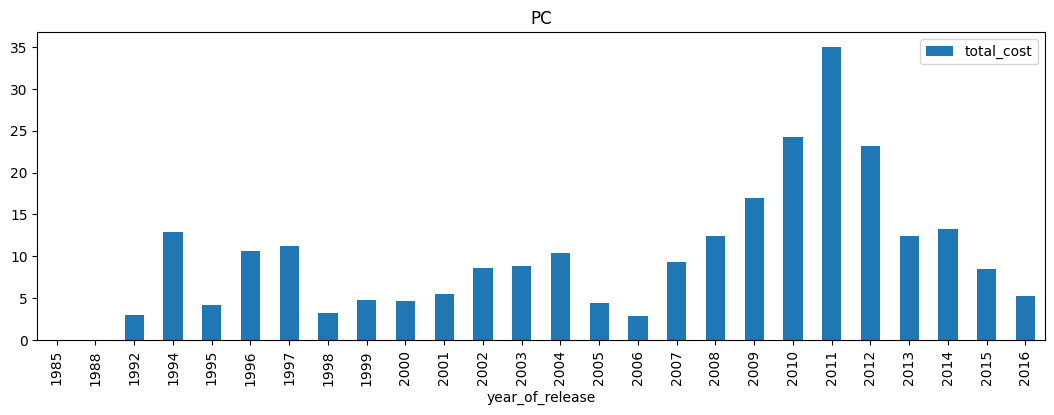

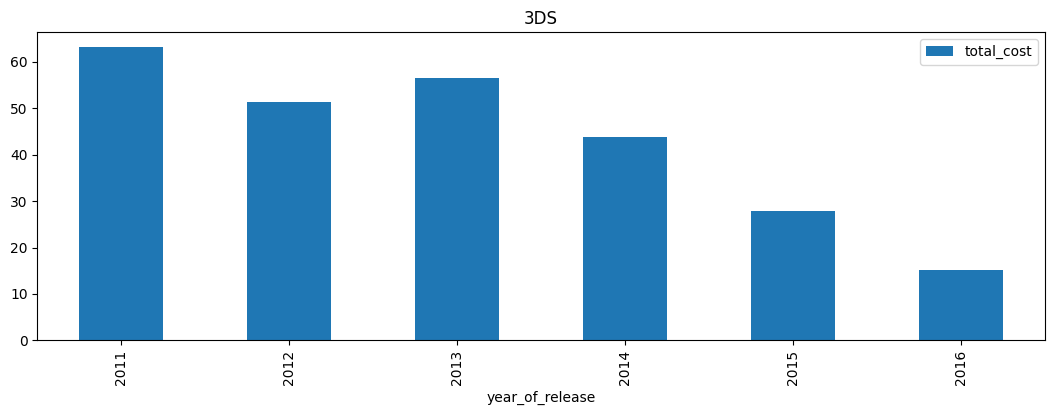

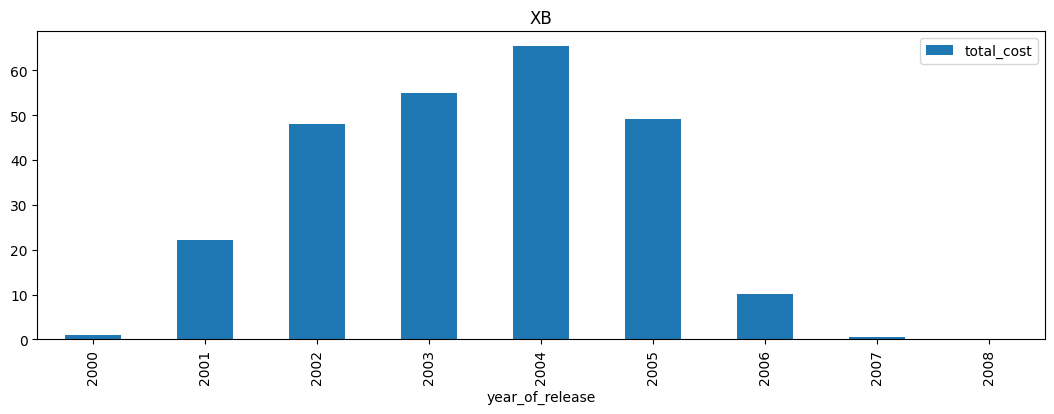

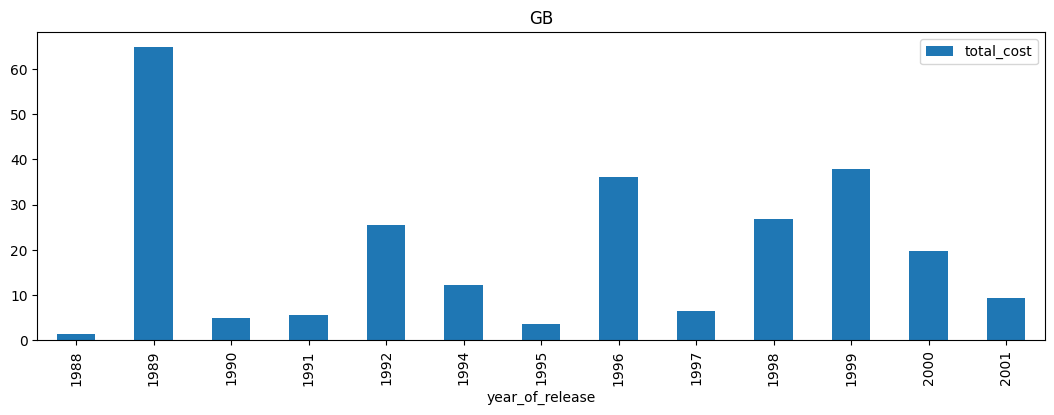

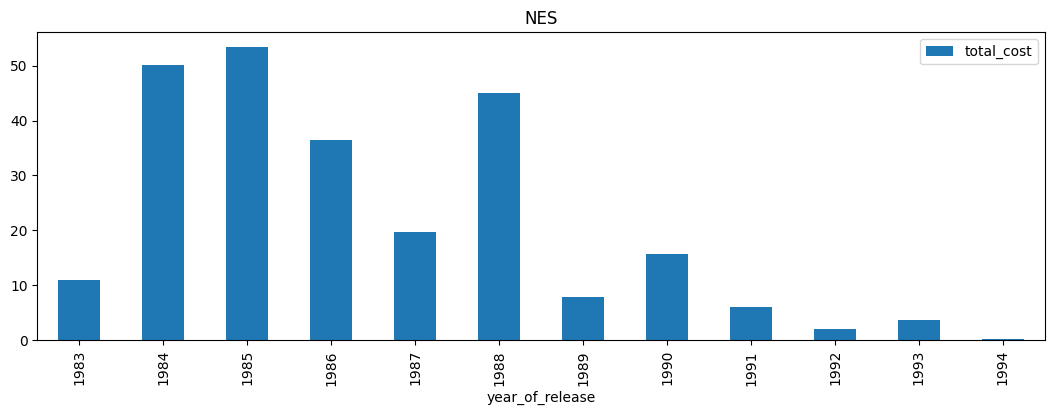

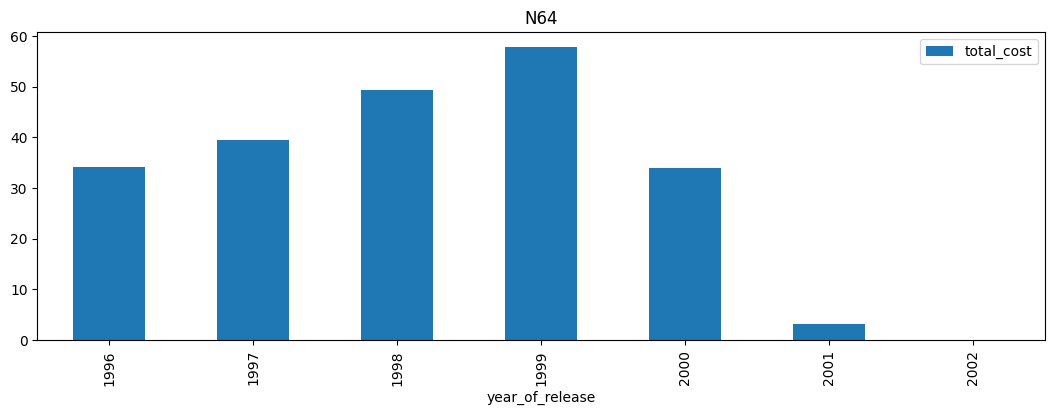

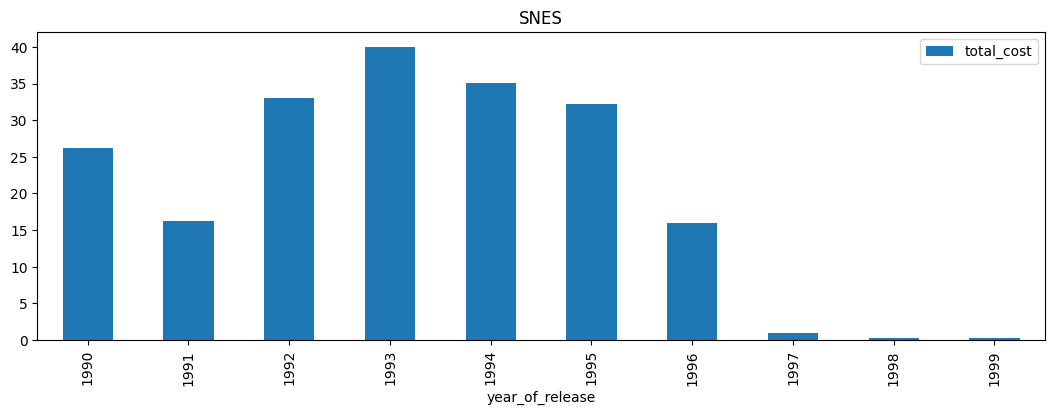

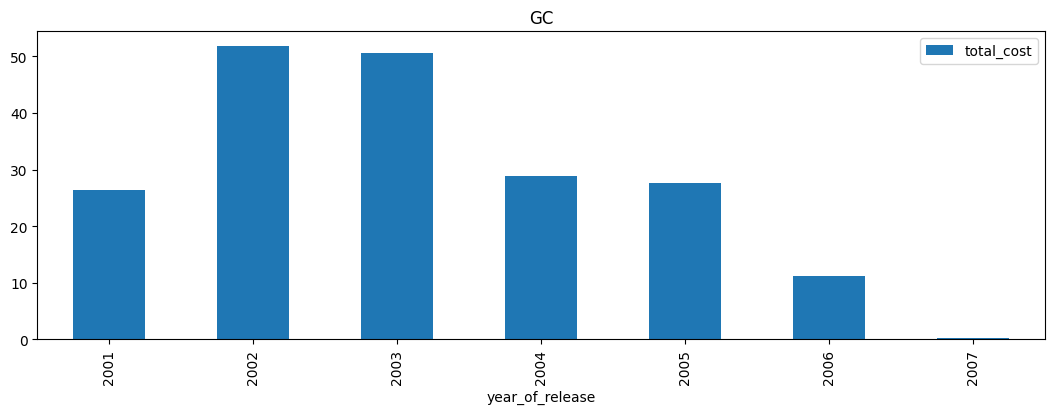

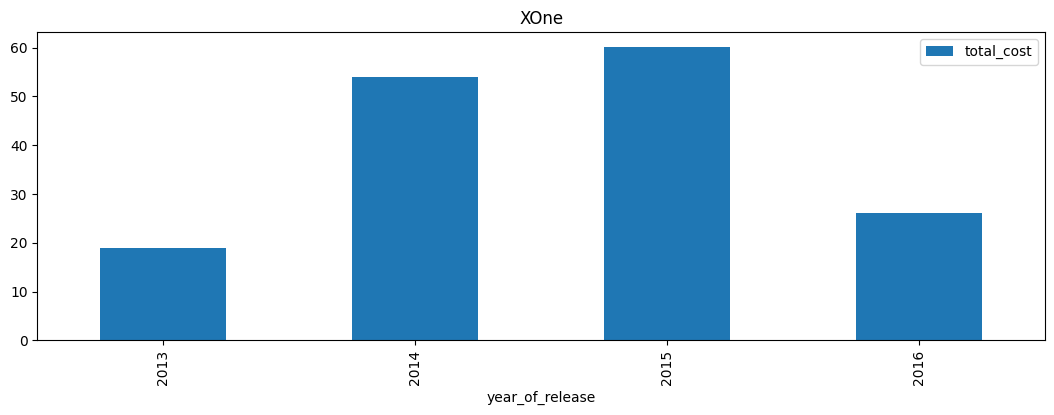

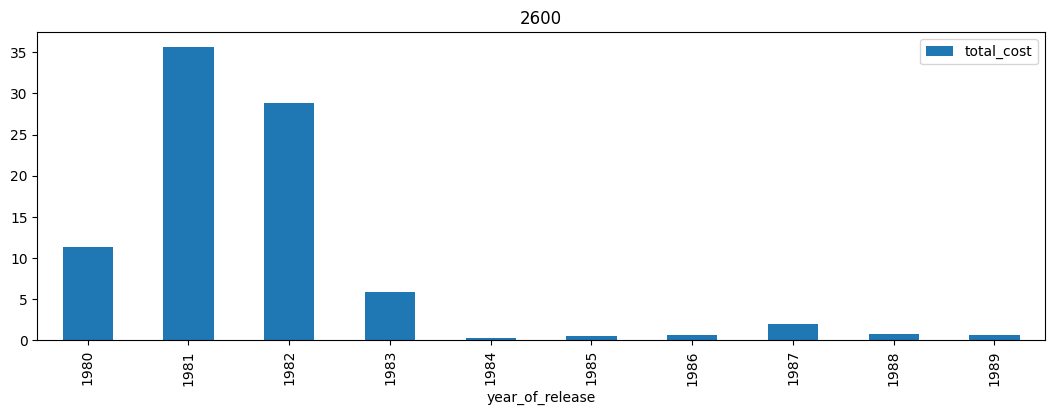

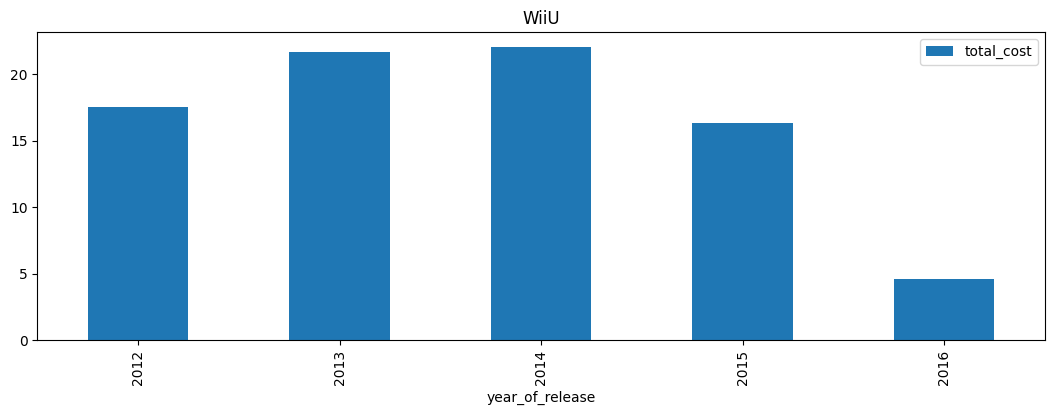

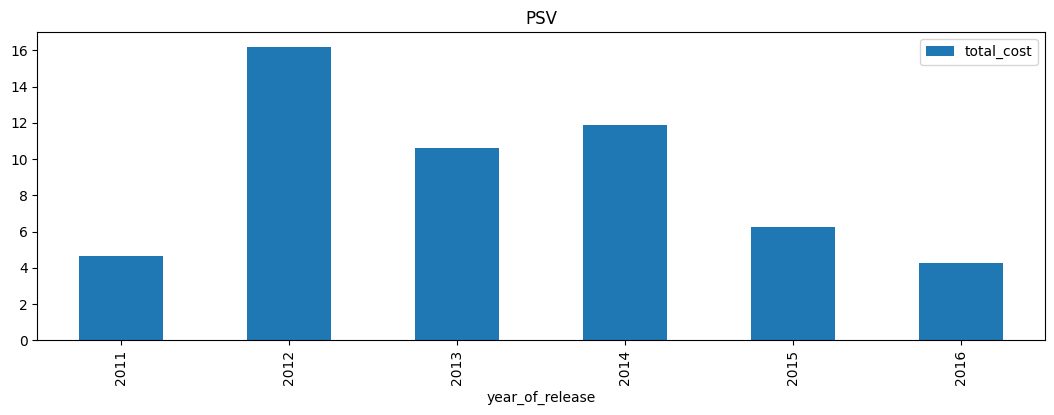

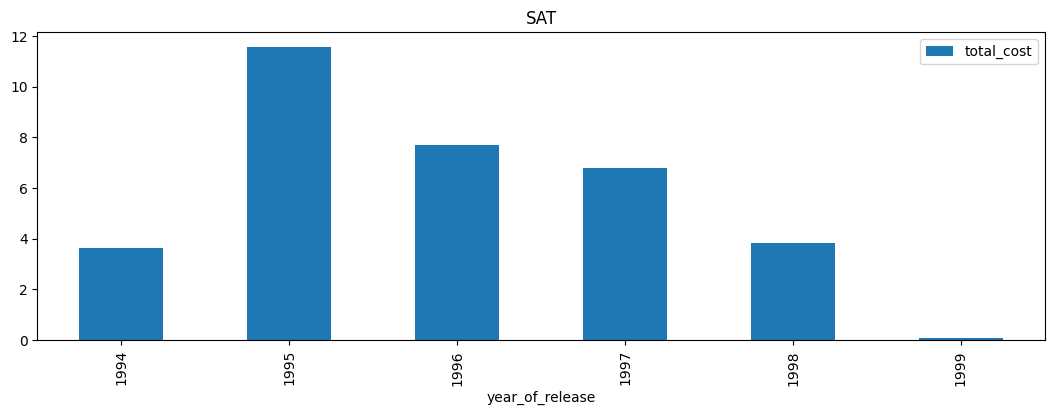

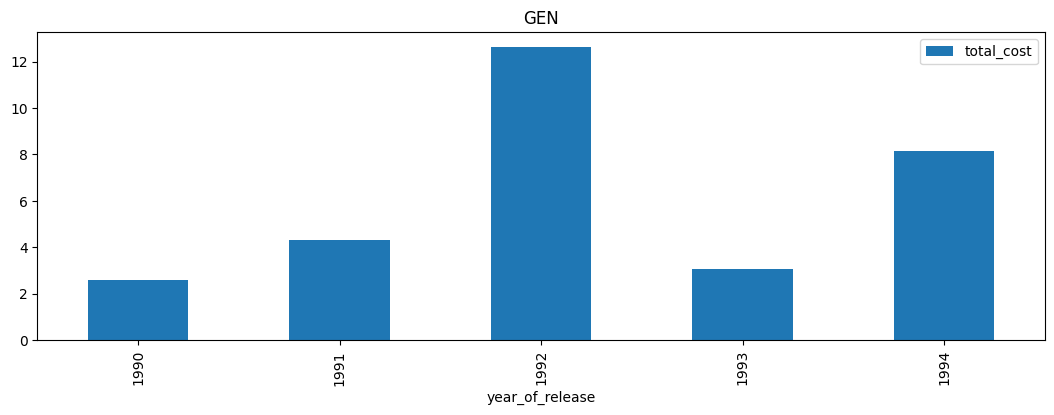

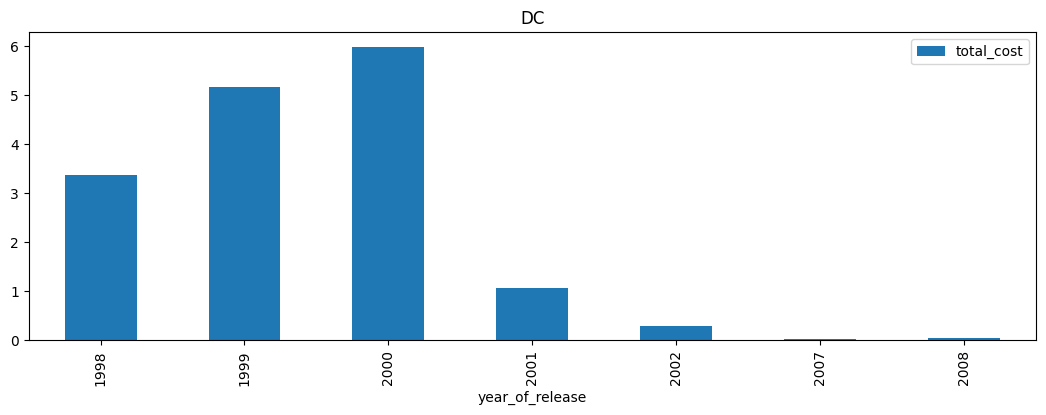

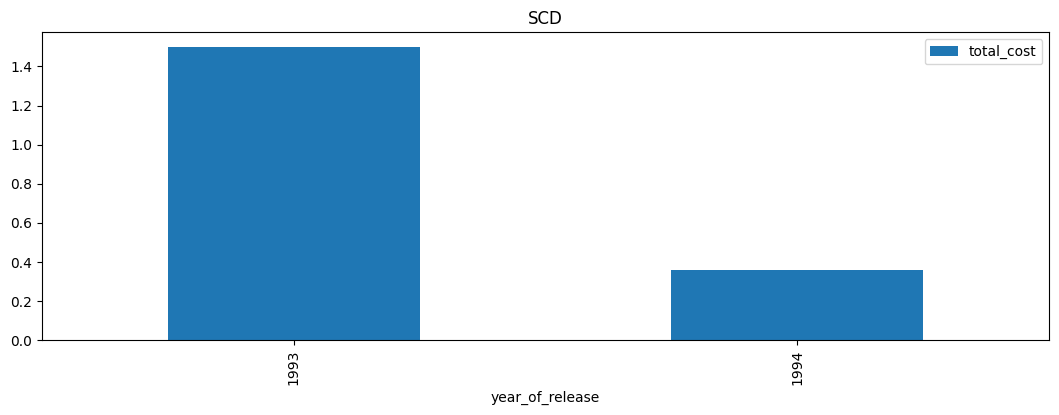

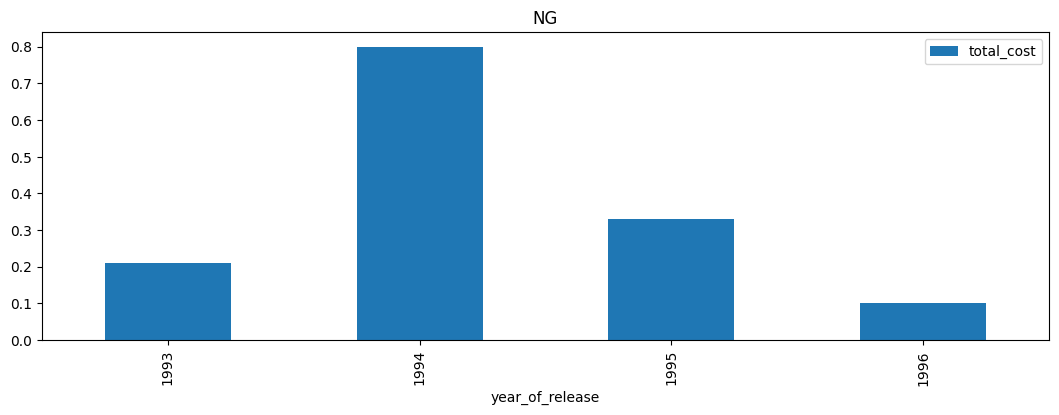

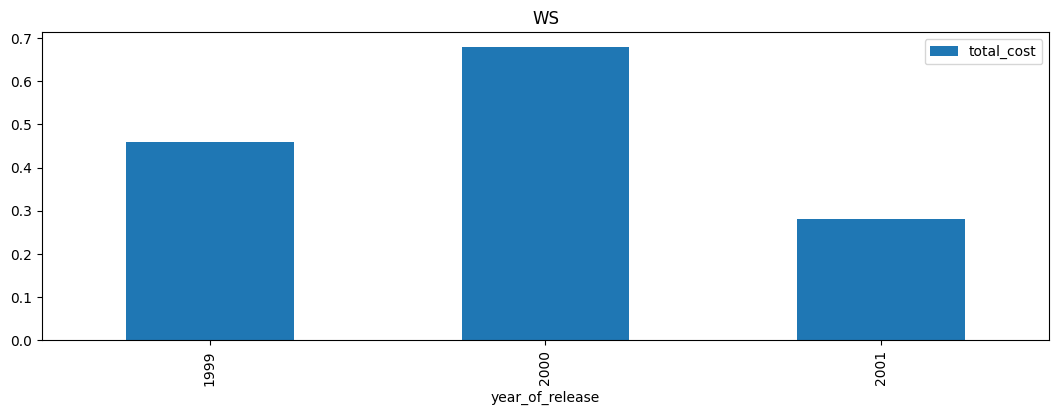

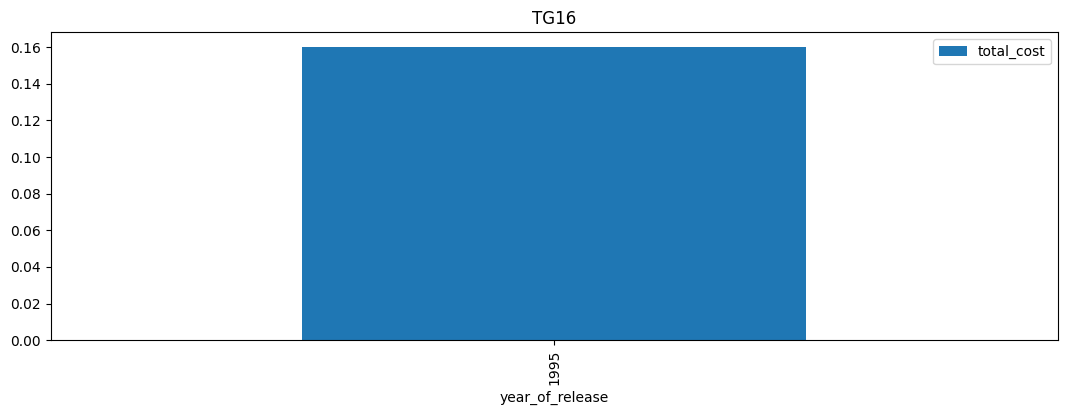

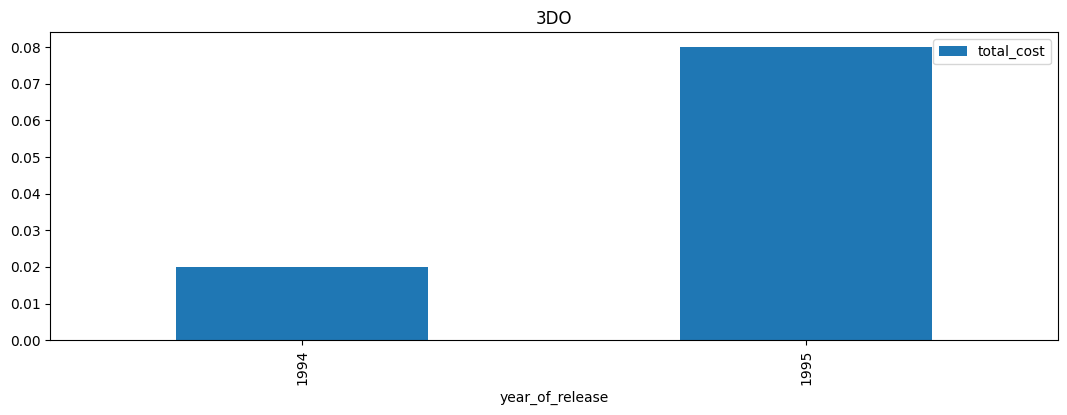

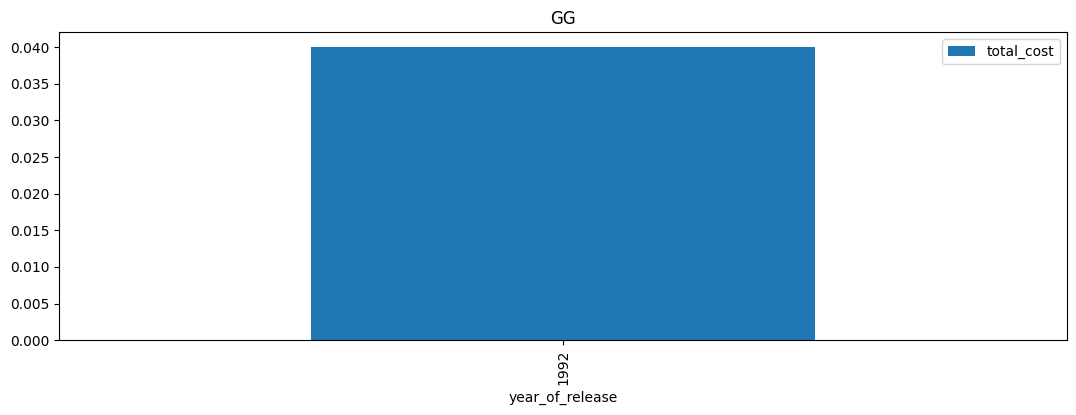

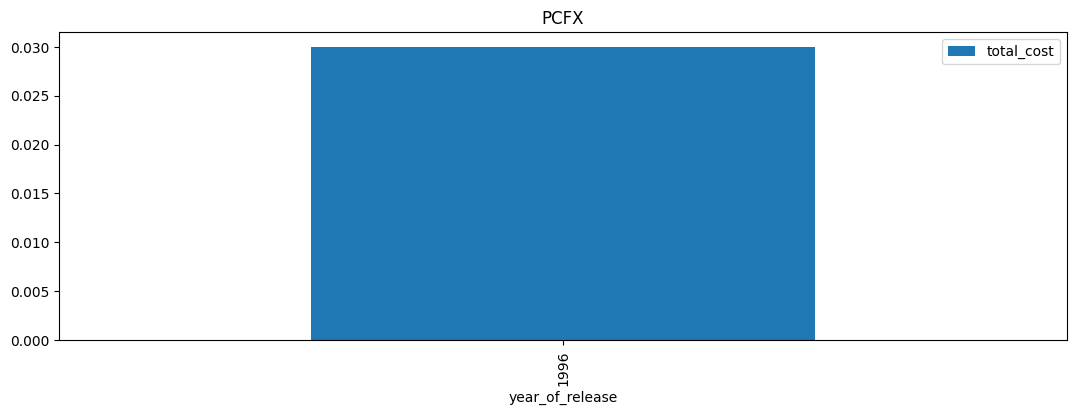

In [63]:
#Построим распределения по годам для каждой платформы.
for platform in top_platforms_list:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_cost', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

Судя по графикам самые живчики у нас это:
1. X360
2. PS3
3. Wii - сомнительно
4. PS4
5. PSP - сомнительно
6. PC
7. 3DS
8. Xone
9. WiiU
10. PSV

In [64]:
top_5_platforms = df.pivot_table(index='platform', values='total_cost', aggfunc='sum').sort_values(
    by='total_cost', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

In [65]:
top_5_platforms

,platform,total_cost
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


Исходя из данных могу сделать выводы что современные платформы живут в среднем 8-10 лет, более старые платформы до 5 лет.
Пятерка лучших сильно теряет позиции к 2016 году, кроме PS2 она закончилась уже в 2011, будем выбириать актуальный период 

In [66]:
new_df = df.query('year_of_release >= 2013')
new_df.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_cost
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,-1,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


За актуальные данные возьмем данные с 2013 года так как многи платформы уже окночили свой цикл, потроим новый топ по актуальным платформам

In [67]:
new_top_5_platforms = new_df.pivot_table(index='platform', values='total_cost', aggfunc='sum').sort_values(
    by='total_cost', ascending=False)
new_top_5_platforms = new_top_5_platforms.reset_index().rename_axis(None, axis=1)
new_top_5_platforms.head(10)

,platform,total_cost
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


Теперь можем посмотреть на самые поплуярные актуальные платформы 

In [68]:
new_top_5_platforms.groupby('platform')['total_cost'].describe().T

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00
mean,143.25,1.54,39.43,181.43,314.14,3.5,32.99,13.66,64.63,136.8,159.32
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,143.25,1.54,39.43,181.43,314.14,3.5,32.99,13.66,64.63,136.8,159.32
25%,143.25,1.54,39.43,181.43,314.14,3.5,32.99,13.66,64.63,136.8,159.32
50%,143.25,1.54,39.43,181.43,314.14,3.5,32.99,13.66,64.63,136.8,159.32
75%,143.25,1.54,39.43,181.43,314.14,3.5,32.99,13.66,64.63,136.8,159.32
max,143.25,1.54,39.43,181.43,314.14,3.5,32.99,13.66,64.63,136.8,159.32


Почему то в стандратном отклонении nanы , долго я бился с этими таблицами если честно )

In [69]:
#plt.figure(figsize=(20,20))
#sns.boxplot(data=new_df , x='platform', y='total_cost')
#plt.set_ylim=(0,2)
#plt.title('Ящик с усами', fontsize=15)
#plt.xlabel('Платформа', fontsize=12)
#plt.ylabel('Глобальные продажи',fontsize=12)

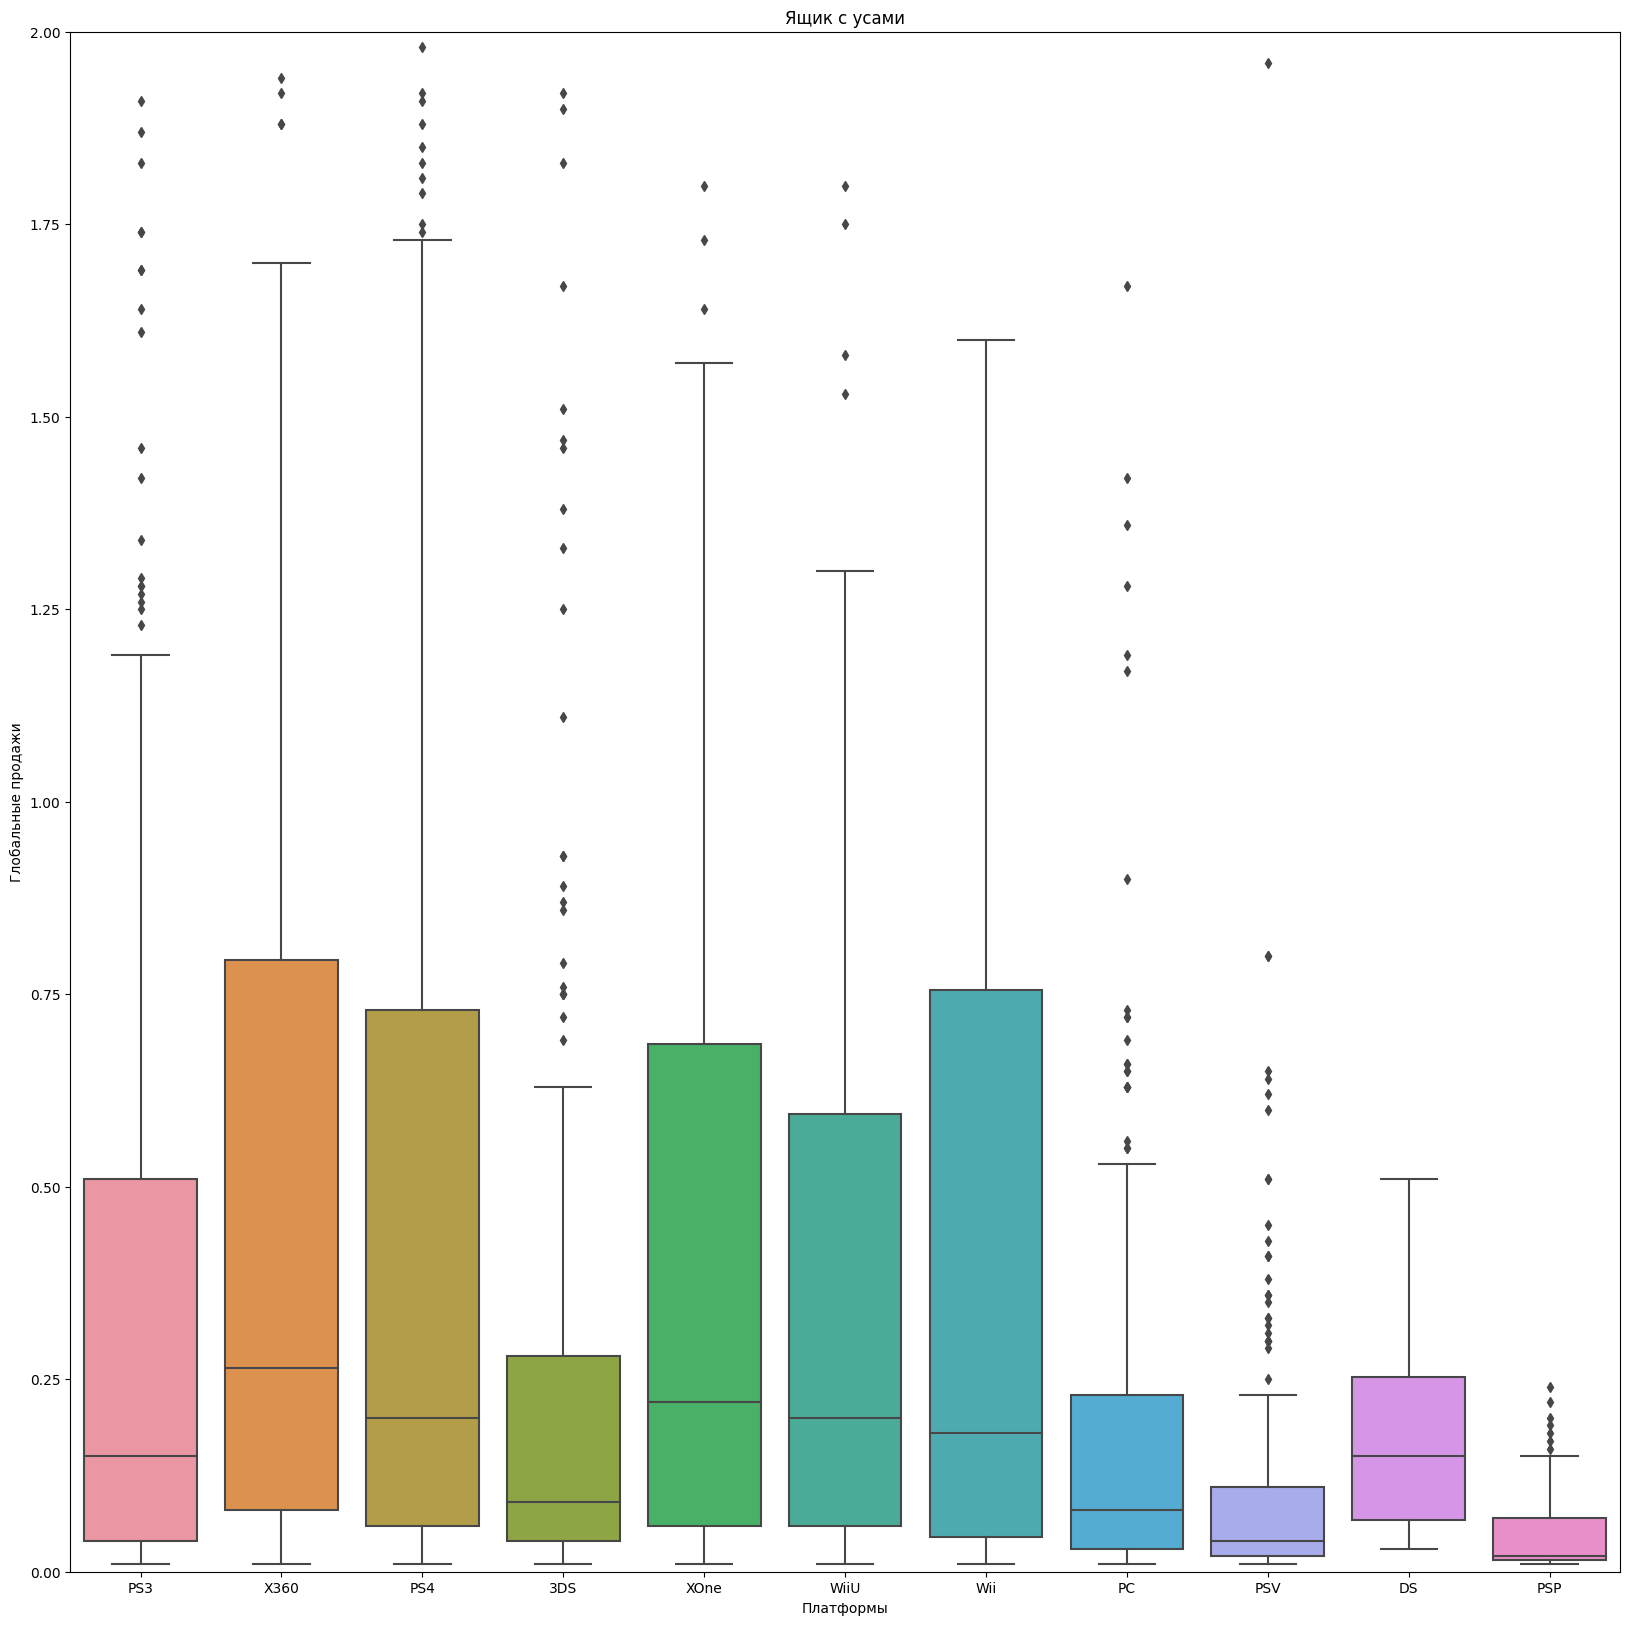

In [70]:
plt.figure(figsize=(20,20))
(sns.boxplot(data = new_df, y = 'total_cost', x='platform')
    .set(title = 'Ящик с усами', xlabel = 'Платформы', ylabel = 'Глобальные продажи', ylim=(0, 2)))
plt.show()

Долго пытался сделать ящик более информотивным но результат не очень, по нему конечно можно сделать выводы, что выбросы т.е выскоие продажи есть у платформ
1. PS3 
2. X360
3. PS4
4. 3DS
5. XOne
6. wiiU
7. Wii
Как мы видим платформы на которые самая выская активность с PS3 по wiiU 
wii - видимо уже отжил свой цикл жизни а PC стабилен не не очень доходен 

In [71]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_cost
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,-1,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### 3.1 Корреляция между отзывами и продажами 

In [72]:
# Комментарий ревьюера
df.year_of_release.min()

1980

In [73]:
new_df.year_of_release.min()

2013

<AxesSubplot:>

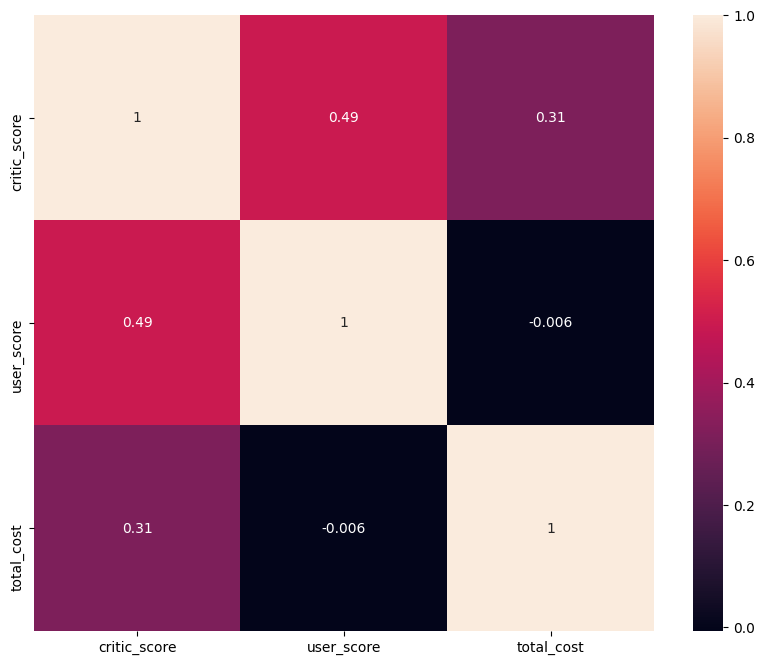

In [74]:
plt.figure(figsize=(10, 8))
corr_df = new_df.query('critic_score > 1 & user_score > 1')
sns.heatmap(corr_df[['platform', 'critic_score', 'user_score', 'total_cost']].corr(),annot=True)

Общая матрица корреляции 

In [75]:
#Корреляция между оценками пользователей и продажами 
sony_play_station4 = new_df[new_df['platform']=='PS4']
sony_play_station4['user_score'].corr(sony_play_station4['total_cost'])

0.11596149312860109

In [76]:
#Корреляция между оценками критиков и продажами
sony_play_station4 = new_df[new_df['platform']=='PS4']
sony_play_station4['critic_score'].corr(sony_play_station4['total_cost'])

0.22652606614612358

Text(0.5, 1.0, 'corr_ps4_users')

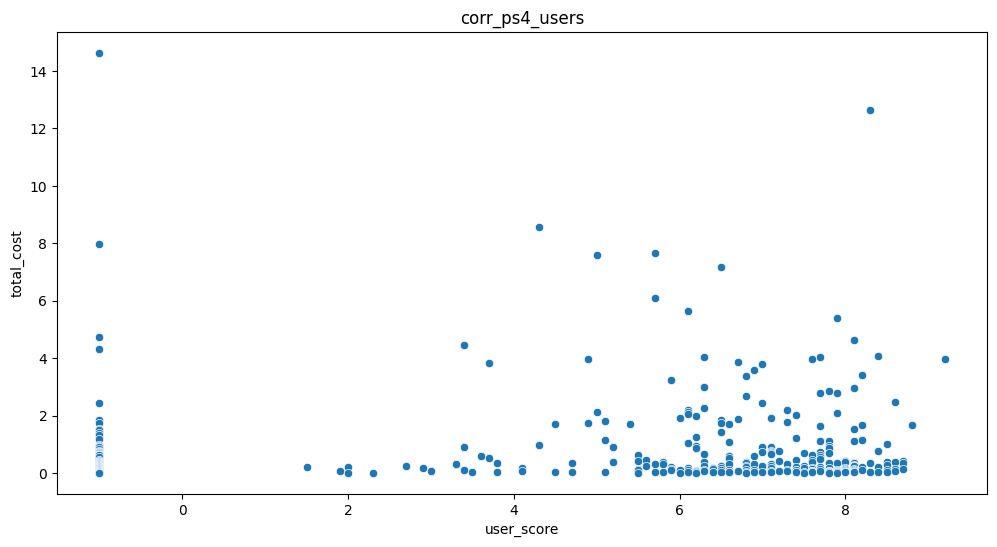

In [77]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_cost', data=sony_play_station4)
plt.title('corr_ps4_users')

Упс попали маркерные значения, попробуем поправить 

In [78]:
sony_play_station4 = sony_play_station4.query('user_score > 0')

Text(0.5, 1.0, 'corr_ps4_users')

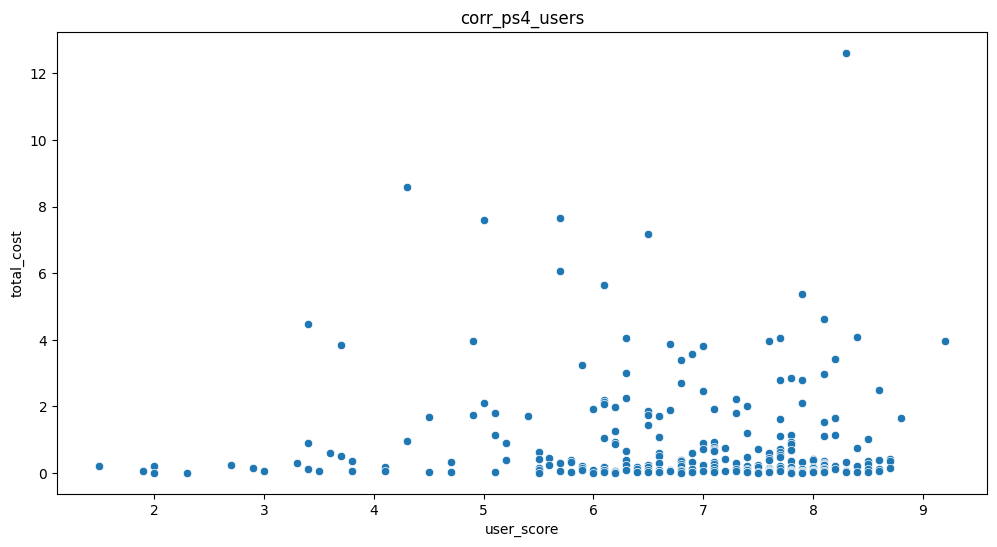

In [79]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_cost', data=sony_play_station4)
plt.title('corr_ps4_users')

теперь лучше но как мы видим не всегда хорошие оценки связанны с прибылью, но все таки взаимосвязь на мой взгялд есть 

In [80]:
sony_play_station4 = new_df[new_df['platform']=='PS4']
sony_play_station4['critic_score'].corr(sony_play_station4['total_cost'])

0.22652606614612358

Корреляция с оценками критиков 

In [81]:
sony_play_station4 = sony_play_station4.query('critic_score > 1')

Text(0.5, 1.0, 'corr_ps4_critics')

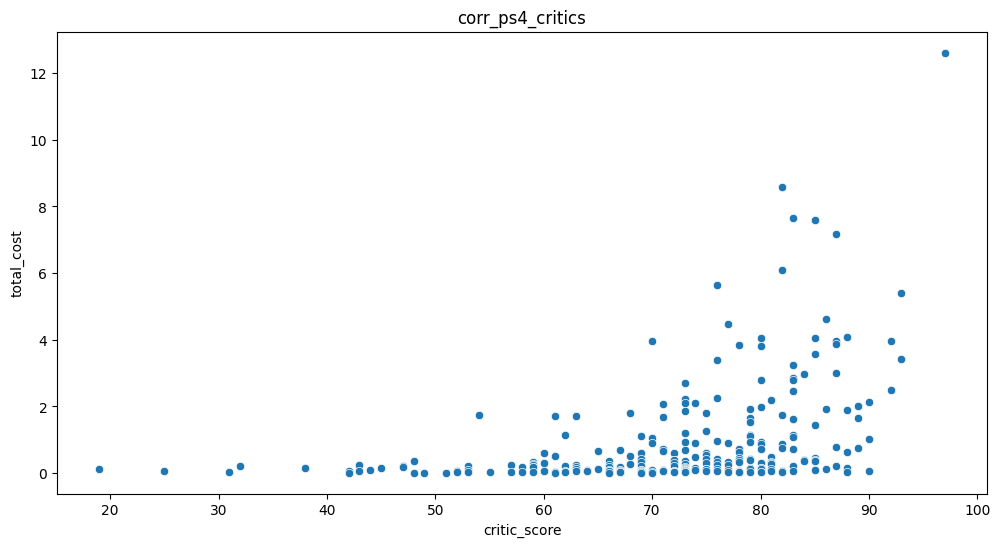

In [82]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_cost', data=sony_play_station4)
plt.title('corr_ps4_critics')

А вот оценки критиков имееют более выскоую связь к продажам чем оценки игроков 

In [83]:
game_xone = new_df.query('platform == "XOne" and user_score != -1 and critic_score != -1')
display(game_xone.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_cost
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


Выделим Xone

In [84]:
game_xone['user_score'].corr(game_xone['total_cost'])

-0.09400318326920859

In [85]:
game_xone['critic_score'].corr(game_xone['total_cost'])

0.41042203561296403

Корреляция между лценками пользователей и критиков 

Text(0.5, 1.0, 'corr_xone_user')

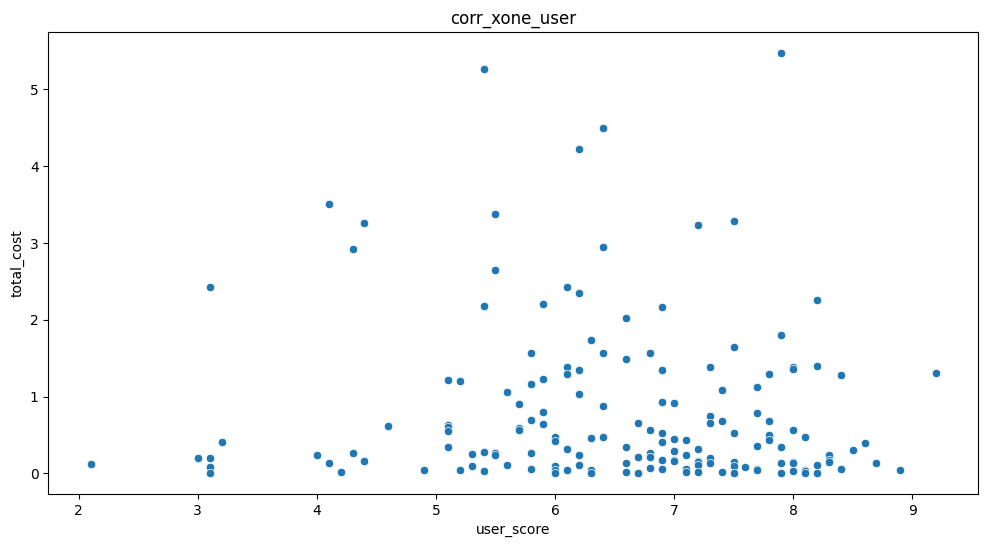

In [86]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_cost', data=game_xone)
plt.title('corr_xone_user')

Text(0.5, 1.0, 'corr_xone_critic')

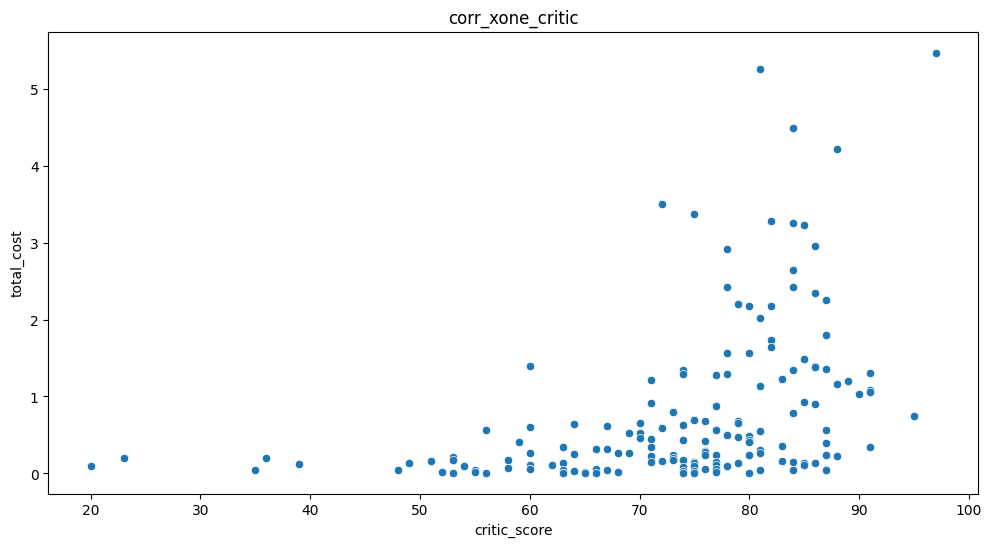

In [87]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_cost', data=game_xone)
plt.title('corr_xone_critic')

Как видим оценки критиков и здесь имеют более большое влияние чем пользователй как и в случае с ps4 

In [88]:
game_3ds = new_df.query('platform == "3DS" and user_score != -1 and critic_score != -1')
display(game_3ds.head())

#выделим в отдельную таблицу продажи по 3DS

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_cost
235,Luigi's Mansion: Dark Moon,3DS,2013,Action,1.80,1.39,1.11,0.29,86.0,8.4,E,4.59
312,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
448,The Legend of Zelda: A Link Between Worlds,3DS,2013,Action,1.40,1.01,0.46,0.23,91.0,8.9,E,3.10
457,Animal Crossing: Happy Home Designer,3DS,2015,Simulation,0.51,1.02,1.40,0.12,66.0,6.9,E,3.05
677,The Legend of Zelda: Majora's Mask 3D,3DS,2015,Action,1.15,0.55,0.47,0.17,89.0,9.0,E10+,2.34


In [89]:
game_3ds['user_score'].corr(game_3ds['total_cost'])

0.2729904366942444

Корреляция между оценками пользователей 

In [90]:
game_3ds['critic_score'].corr(game_3ds['total_cost'])

0.3392349287853147

Корреляция между оцнеками критиков 

Text(0.5, 1.0, 'corr_3ds_user')

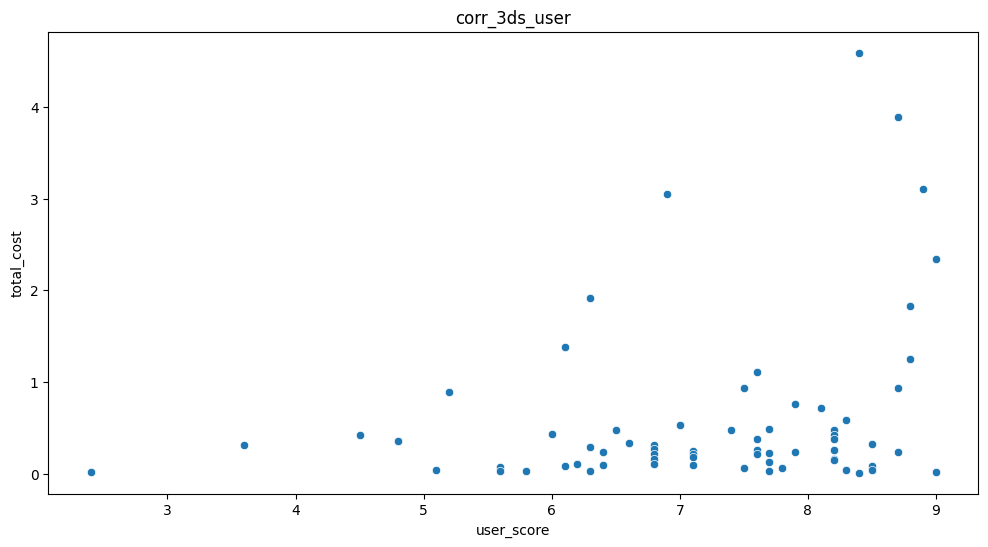

In [91]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_cost', data=game_3ds)
plt.title('corr_3ds_user')

Text(0.5, 1.0, 'corr_3ds_critic')

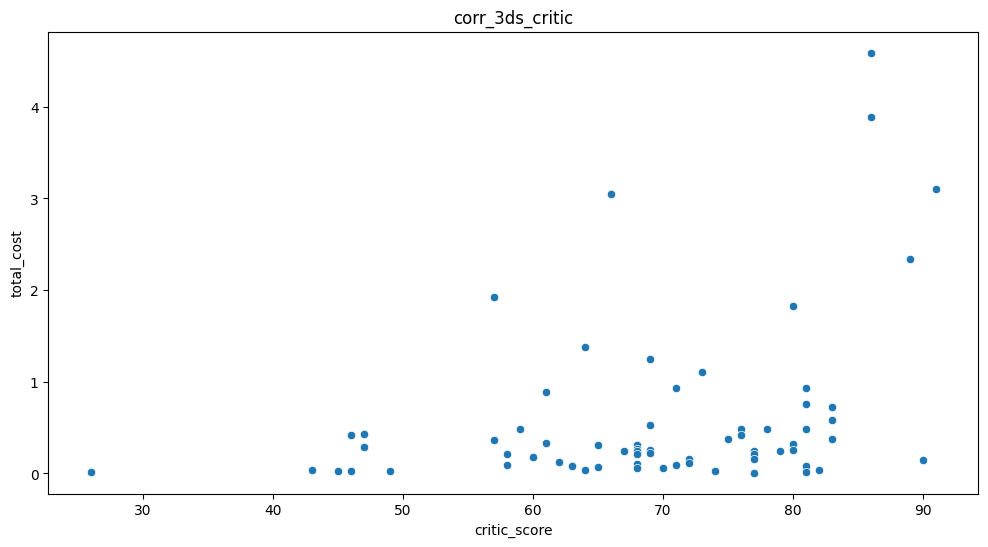

In [92]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_cost', data=game_3ds)
plt.title('corr_3ds_critic')

По 3ds картина от ps4 отличается, тут оценки юзеров и критиков сходятся 

In [93]:
game_ps3 = new_df.query('platform == "PS3" and user_score != -1 and critic_score != -1')
display(game_ps3.head())

#выделим в отдельную таблицу продажи по PS3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_cost
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
337,Assassin's Creed IV: Black Flag,PS3,2013,Action,1.33,1.68,0.13,0.57,88.0,8.1,M,3.71


In [94]:
game_ps3['user_score'].corr(game_ps3['total_cost'])

0.02269094327112414

Корреляция между оценками пользователей 

In [95]:
game_ps3['critic_score'].corr(game_ps3['total_cost'])

0.33380663565061736

Корреляция между оценками критиков 

Text(0.5, 1.0, 'corr_ps3_user')

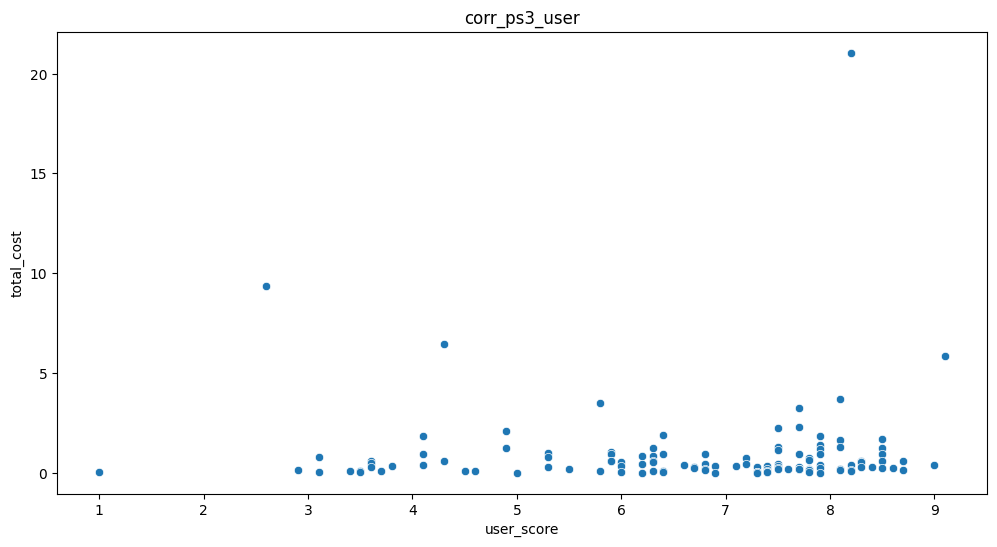

In [96]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_cost', data=game_ps3)
plt.title('corr_ps3_user')

Text(0.5, 1.0, 'corr_ps3_critic')

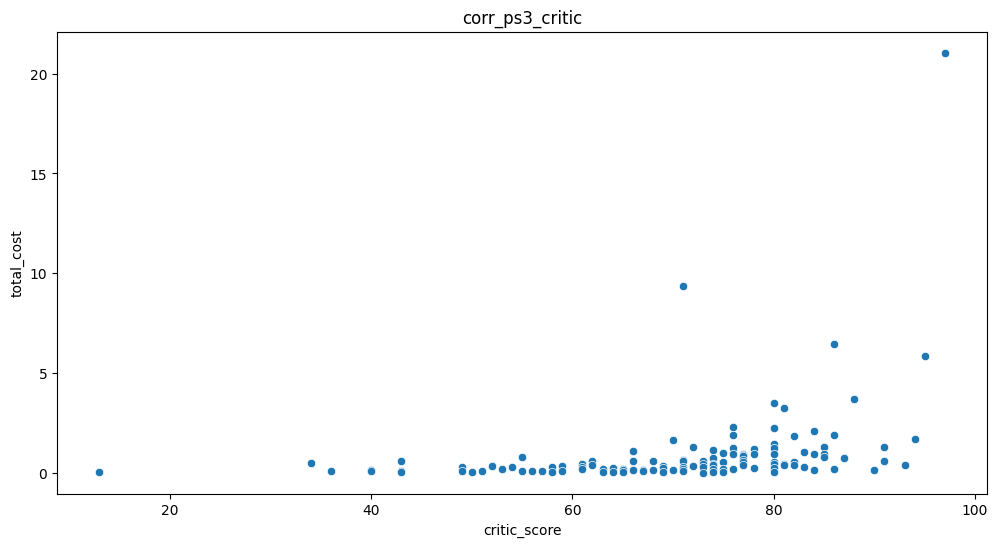

In [97]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_cost', data=game_ps3)
plt.title('corr_ps3_critic')

Катина похожа, но все таки оценки критиков весомее 

In [98]:
game_x360 = new_df.query('platform == "X360" and user_score != -1 and critic_score != -1')
display(game_x360.head())

#выделим в отдельную таблицу продажи по PS3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_cost
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
380,Battlefield 4,X360,2013,Shooter,2.15,1.01,0.02,0.31,79.0,5.6,M,3.49
410,Assassin's Creed IV: Black Flag,X360,2013,Action,1.90,1.11,0.01,0.29,86.0,7.9,M,3.31


In [99]:
game_x360['user_score'].corr(game_x360['total_cost'])

-0.006238179532306317

In [100]:
game_x360['critic_score'].corr(game_x360['total_cost'])

0.3503445460228664

Корреляция между оценками пользователей и критиков 

Text(0.5, 1.0, 'corr_x360_user')

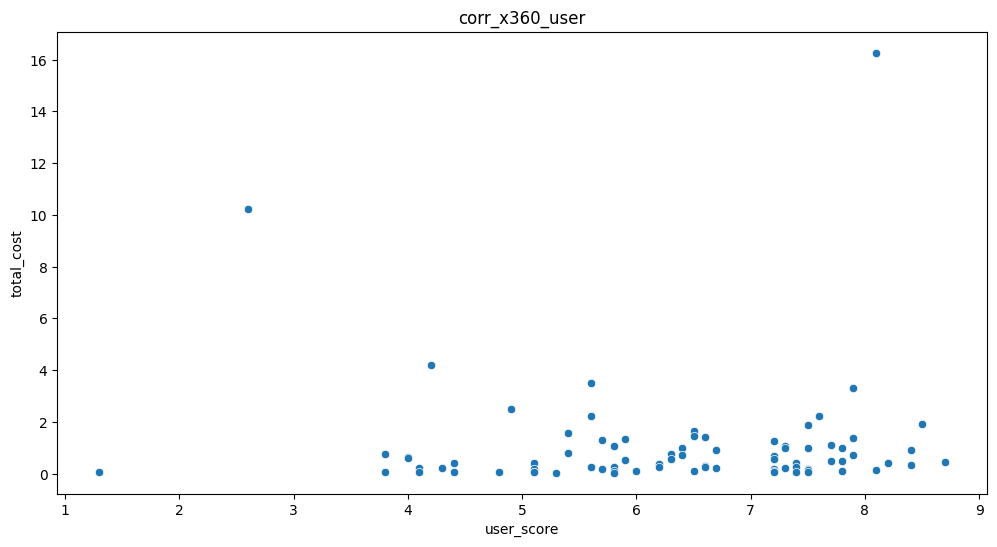

In [101]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_cost', data=game_x360)
plt.title('corr_x360_user')

Text(0.5, 1.0, 'corr_x360_critic')

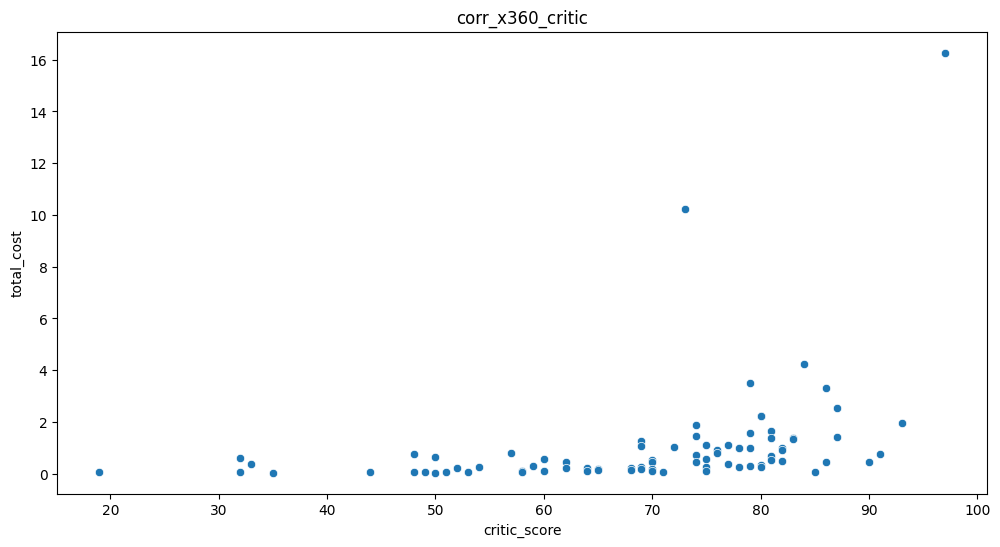

In [102]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_cost', data=game_x360)
plt.title('corr_x360_critic')

Text(0.5, 1.0, 'corr_x360_critic')

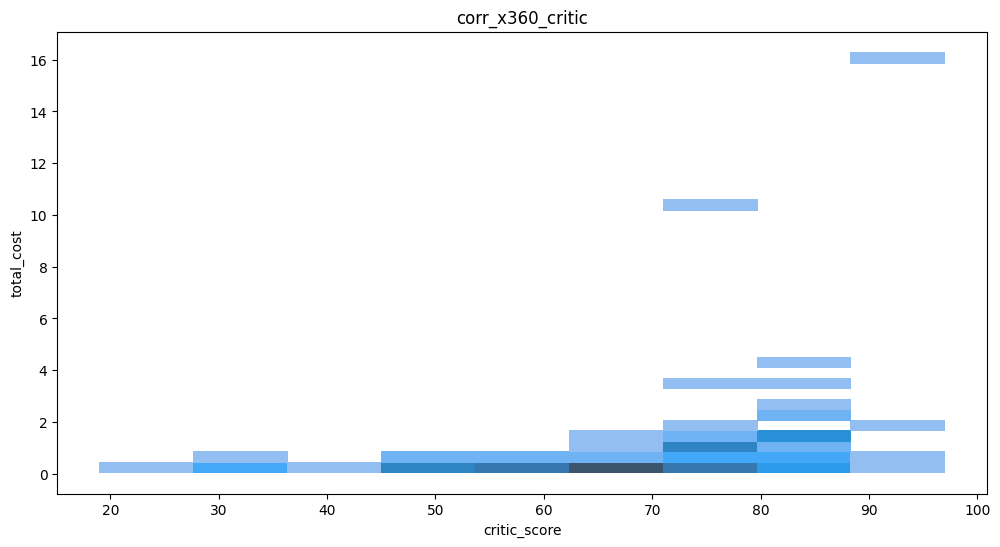

In [103]:
plt.figure(figsize=(12,6))
sns.histplot(x='critic_score', y='total_cost', data=game_x360)
plt.title('corr_x360_critic')

Text(0.5, 1.0, 'corr_x360_critic')

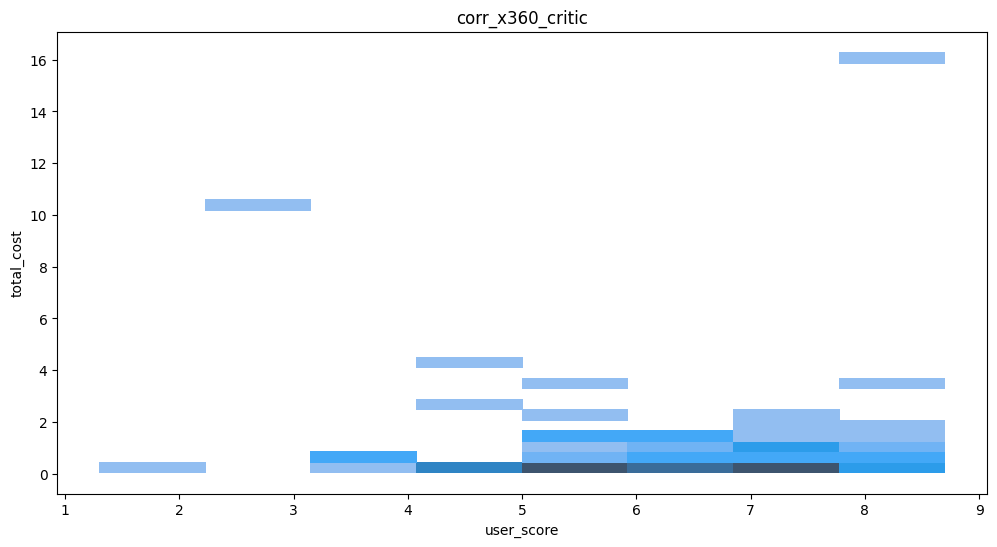

In [104]:
plt.figure(figsize=(12,6))
sns.histplot(x='user_score', y='total_cost', data=game_x360)
plt.title('corr_x360_critic')

Что то мне диаграммы рассеивания казались не очень информотивными так вроде лучше, хотя мне кажется есть способ что бы было еще лучше, но тут точно видно, что оценки критиков более весомы 

In [105]:
game_wiiu =new_df.query('platform == "WiiU" and user_score != -1 and critic_score != -1')
display(game_wiiu.head())
#выделим wiiu в отдельную категорию 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_cost
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
247,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,4.44
260,Super Mario 3D World,WiiU,2013,Platform,2.11,1.16,0.73,0.32,93.0,9.0,E,4.32
424,Super Mario Maker,WiiU,2015,Platform,1.18,0.89,0.94,0.20,88.0,8.7,E,3.21
720,New Super Luigi U,WiiU,2013,Platform,1.25,0.62,0.18,0.18,77.0,7.9,E,2.23


In [106]:
game_wiiu['user_score'].corr(game_wiiu['total_cost'])

0.40869174384926477

In [107]:
game_wiiu['critic_score'].corr(game_wiiu['total_cost'])

0.37950449899784144

Коррляция между оценками критиков и пользователей 

Text(0.5, 1.0, 'corr_wiiu_user')

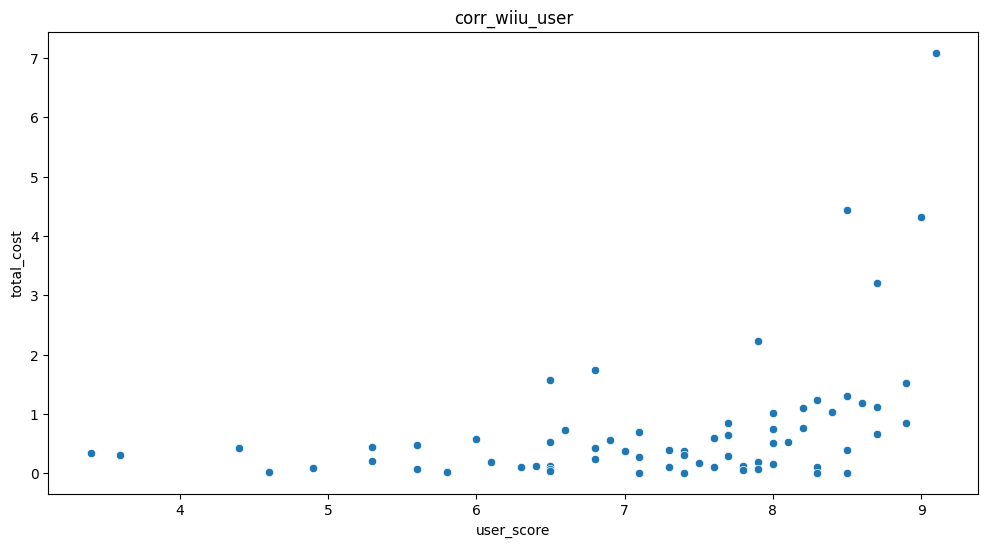

In [108]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_cost', data=game_wiiu)
plt.title('corr_wiiu_user')

Text(0.5, 1.0, 'corr_wiiu_critic')

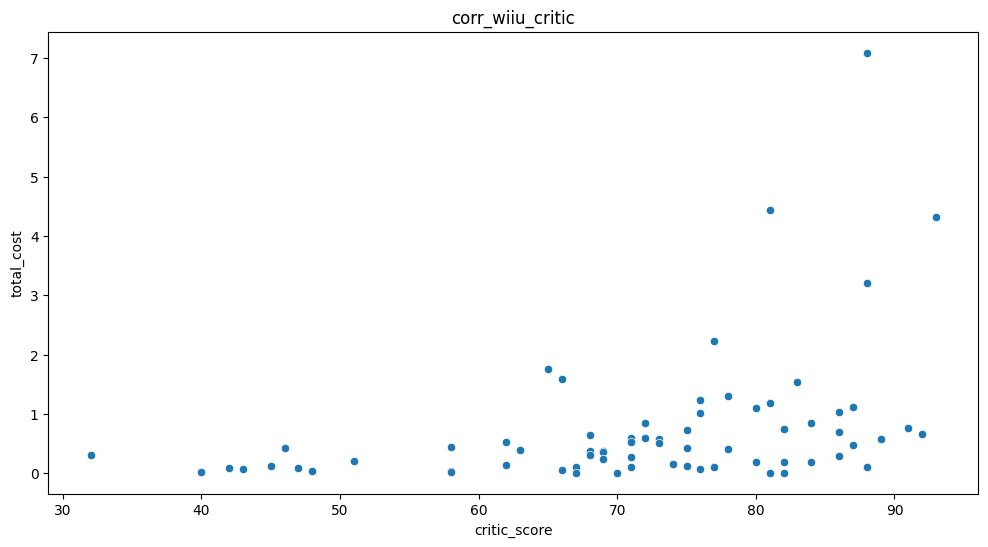

In [109]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_cost', data=game_wiiu)
plt.title('corr_wiiu_critic')

Text(0.5, 1.0, 'corr_x360_critic')

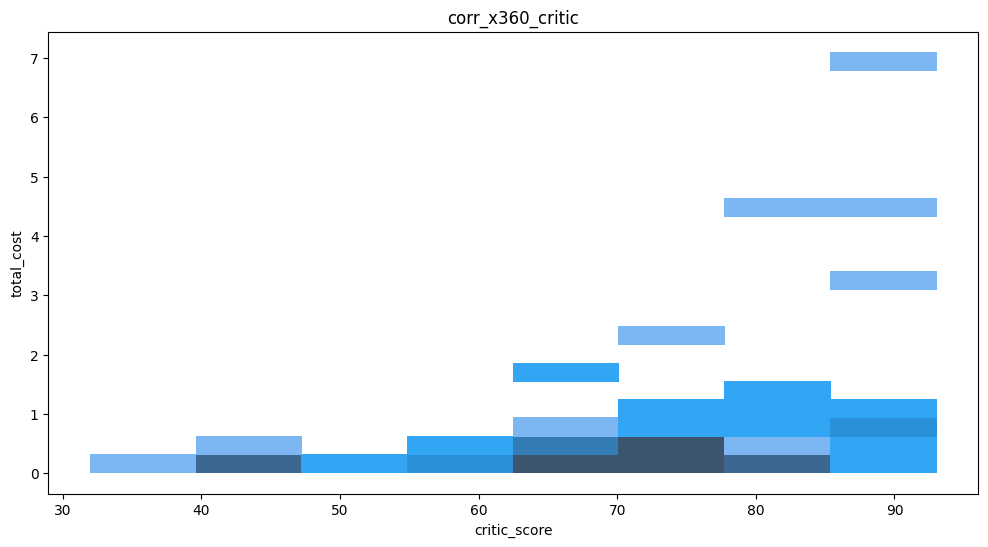

In [110]:
plt.figure(figsize=(12,6))
sns.histplot(x='critic_score', y='total_cost', data=game_wiiu)
plt.title('corr_x360_critic')

Text(0.5, 1.0, 'corr_x360_user')

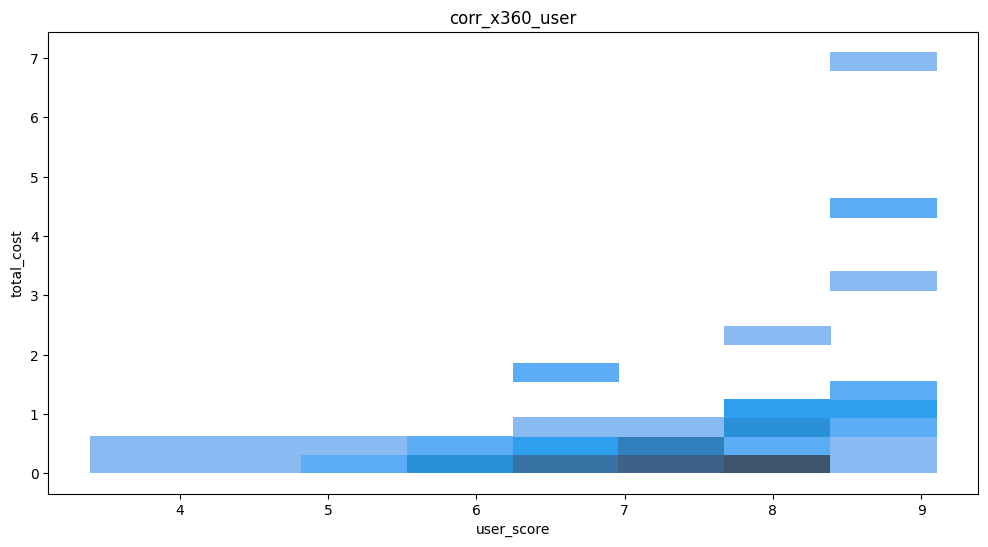

In [111]:
plt.figure(figsize=(12,6))
sns.histplot(x='user_score', y='total_cost', data=game_wiiu)
plt.title('corr_x360_user')

Картина повторилась, оценки критиков более весомы 

В целом я готов сделать вывод, что в своем большенстве оценки критиков и пользователей имеют взаимосвязь с продажами и это логично, если сравнивать между оценками пользователей и критиков то на момент анализа оценки критиков имели более сильное влияние, сейчас мне кажется этот тренд поменялся )
Еще чувствую что этот процесс можно было автомотизировать но как не очень знаю, за пример буду признателен 

In [112]:
new_df.pivot_table(index='genre', values='total_cost', aggfunc='sum').sort_values(by='total_cost', ascending=False)

,total_cost
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


In [113]:
genre_top = new_df.pivot_table(index='genre', values='total_cost', aggfunc='median').sort_values(by='total_cost', ascending=False)
genre_top = genre_top.reset_index()
genre_top

,genre,total_cost
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


Посмотрим на выделение жанров, самые прибыльние у нас шутреы, спорт, платфромы не совсем понимаю почему экшон у нас везде прибыльный но по медиане не очень ) 

Text(0, 0.5, 'Продажи')

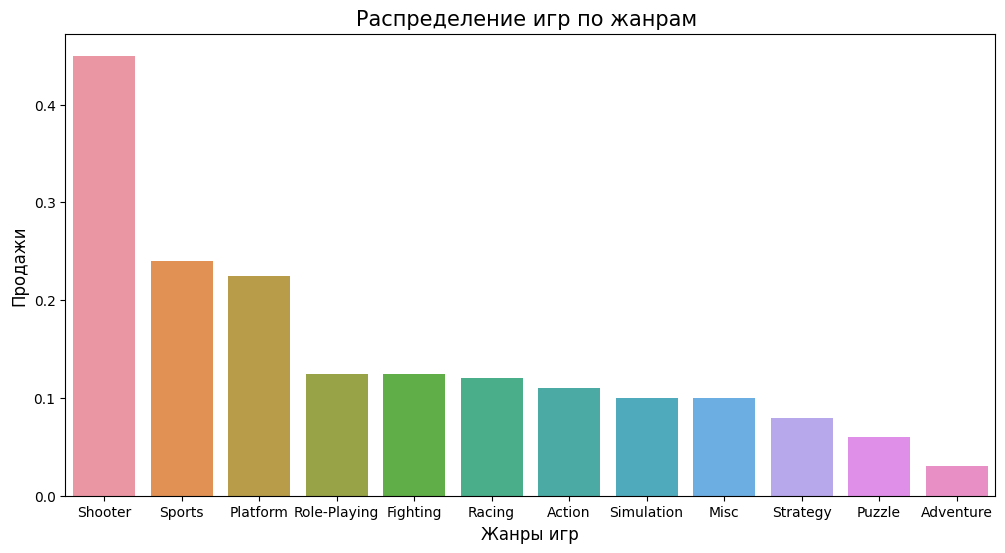

In [114]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=genre_top, x='genre', y='total_cost')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

#построим график продаж игр по жанрам

Text(0, 0.5, 'Глобальные продажи')

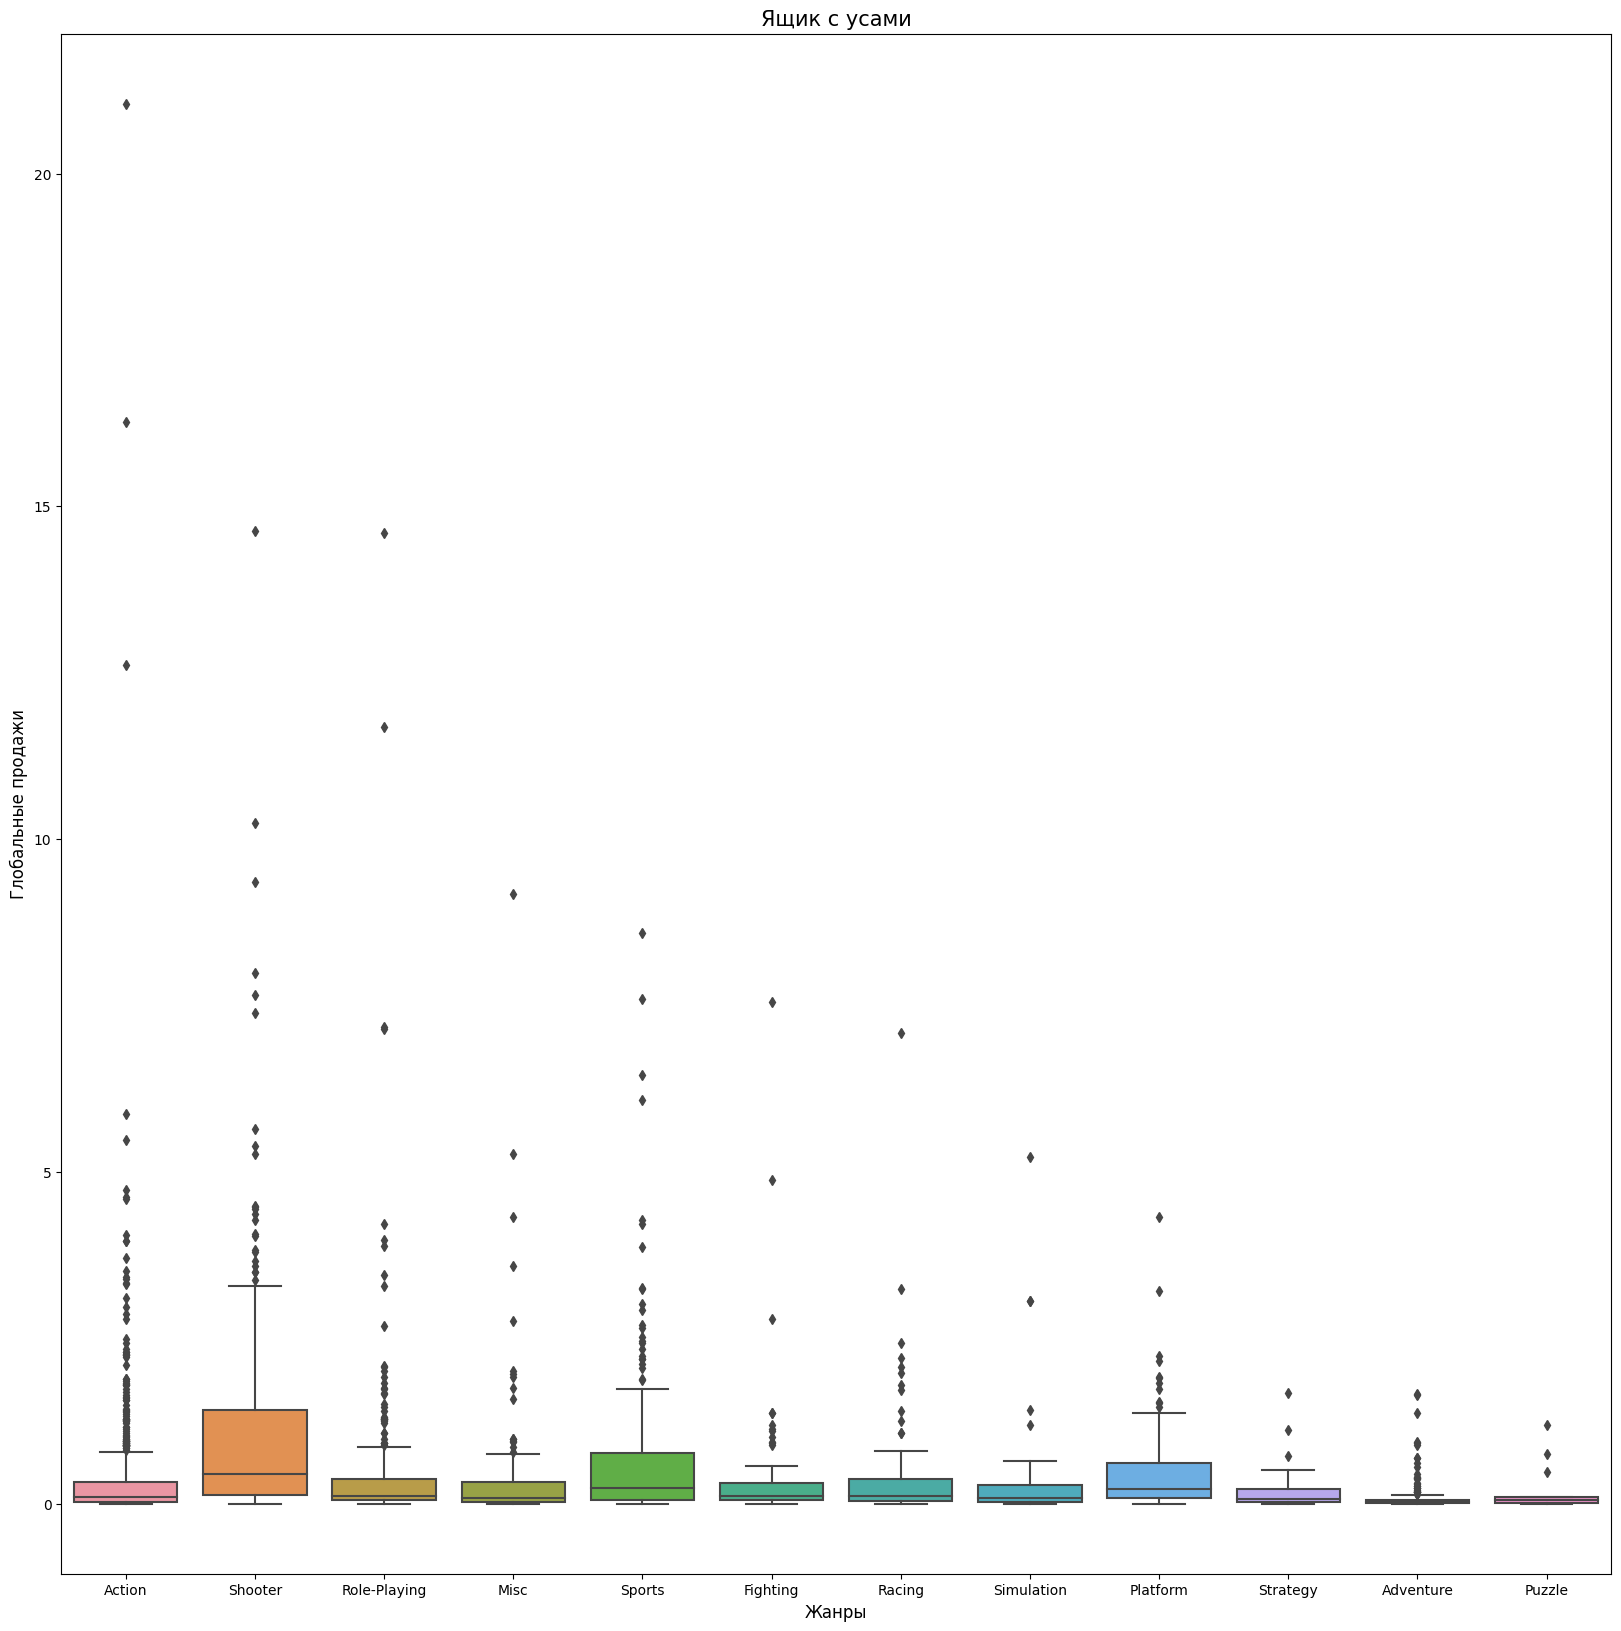

In [115]:
plt.figure(figsize=(20,20))
sns.boxplot(data=new_df , x='genre', y='total_cost')
plt.set_ylim=(-5,10)
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

### 3.2 Вывод

Из основного многие платформы уже отживают свое время по циклу жизни, самые поплуярные плтаформы и на которые нужно ставить PS4 Xone , а PS3 и X360 еще держатся но не так долго им осталось, по связи оценок в основном пользователи прислушиваются к оценкам критиков больше, чем пользователей, по жанрам самый топ у нас шутеры, спорт, и неожиданно платформеры 

## Шаг 4. Составьте портрет пользователя каждого региона.

In [116]:
pl_am = new_df.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)
display(pl_am)

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


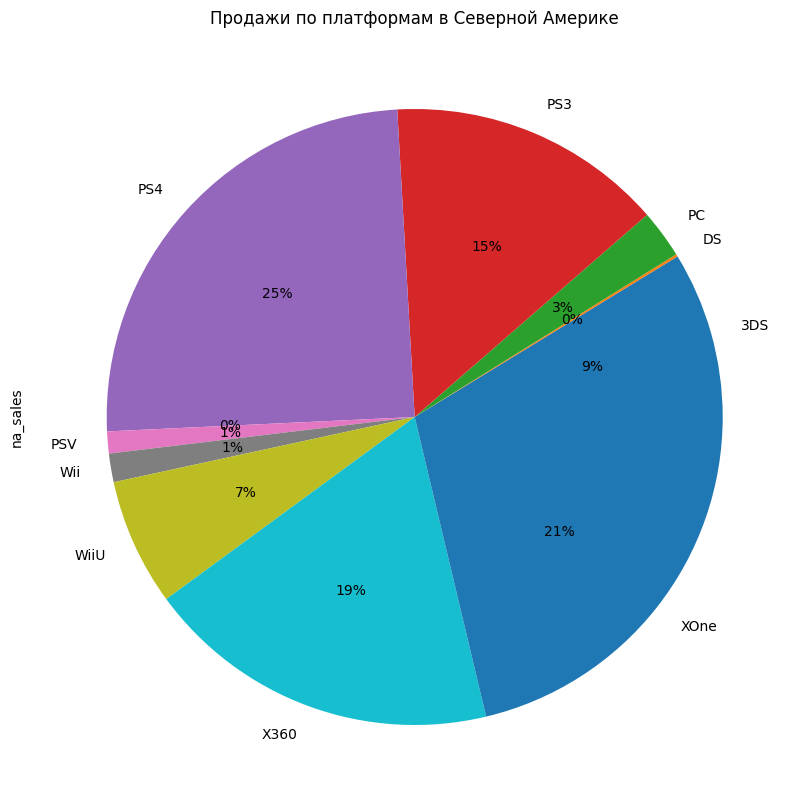

In [117]:
pl_am = new_df.groupby('platform')['na_sales'].sum()
pl_am.plot(kind='pie', figsize=(10,10),autopct='%1.0f%%',title='Продажи по платформам в Северной Америке')
plt.show()

In [118]:
gen_am = new_df.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
gen_am.head(5)

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


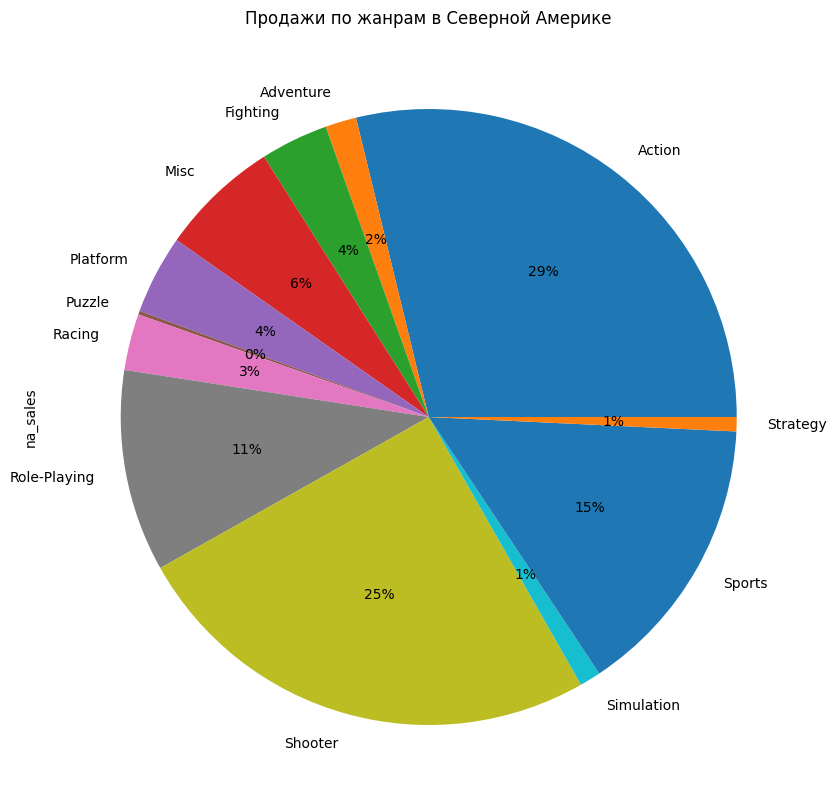

In [119]:
gen_am = new_df.groupby('genre')['na_sales'].sum()
gen_am.plot(kind='pie', figsize=(10, 10),autopct='%1.0f%%',title='Продажи по жанрам в Северной Америке')
plt.show()

In [120]:
rt_am = new_df.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)
display(rt_am)

,rating,na_sales
3,M,165.21
0,-1,89.42
1,E,79.05
2,E10+,54.24
4,T,49.79


Тут у меня есть вопрос, в анализ попала заглушка пробывал сделать срез через query но тут тип object как убарть заглушку ?) 

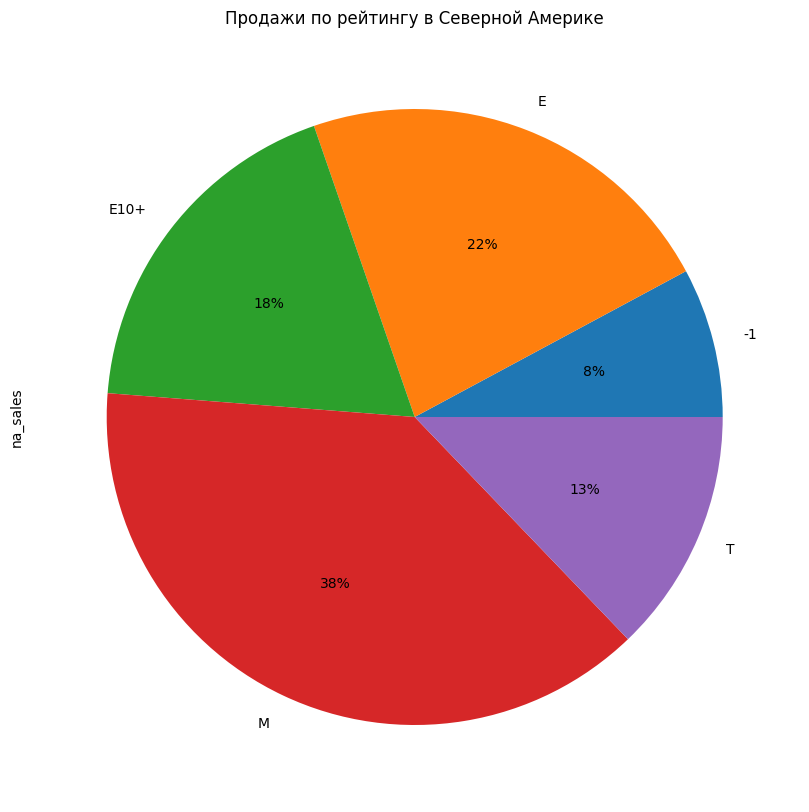

In [121]:
rt_am = new_df.groupby('rating')['na_sales'].mean()
rt_am.plot(kind='pie', figsize=(10, 10),autopct='%1.0f%%',title='Продажи по рейтингу в Северной Америке')
plt.show()

В Северной Амереке по платформам в топе у нас PS4 Xone
Самые поплуряные жанры экшон и шутеры 
Рейтинг М и Е Е10

Проведем такой же анализ для европы 

In [122]:
pl_eu = new_df.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)
display(pl_eu)

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


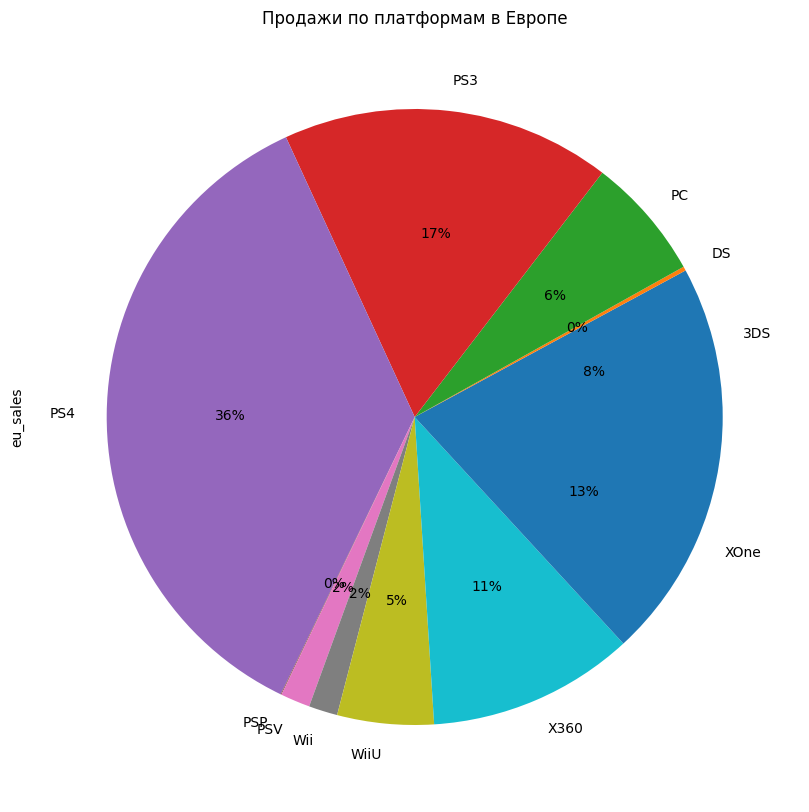

In [123]:
pl_eu = new_df.groupby('platform')['eu_sales'].sum()
pl_eu.plot(kind='pie', figsize=(10,10),autopct='%1.0f%%',title='Продажи по платформам в Европе')
plt.show()

In [124]:
gen_eu = new_df.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
gen_eu.head(5)

,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


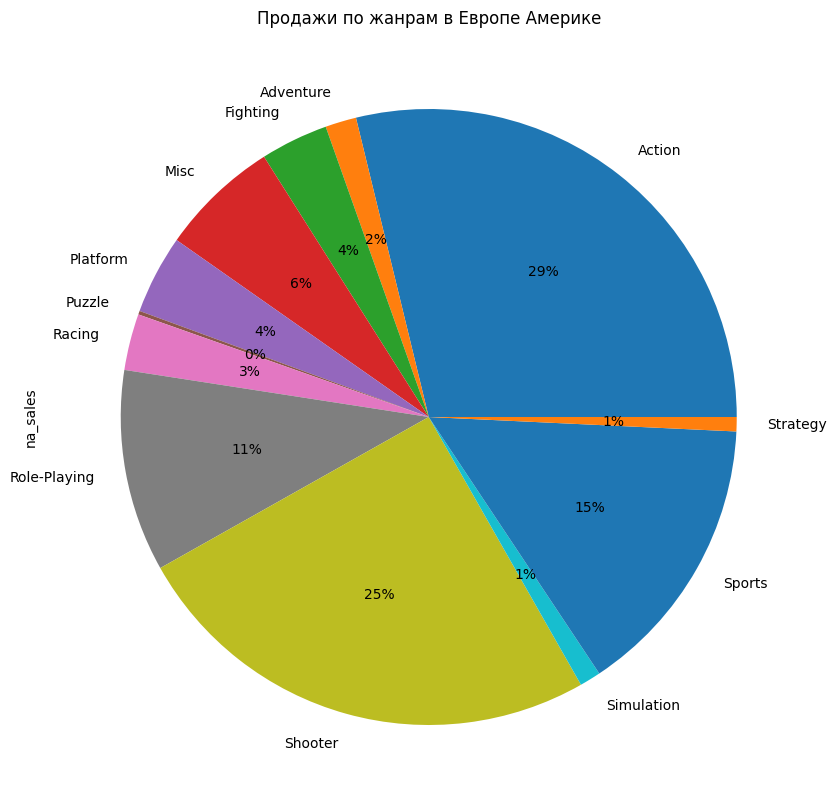

In [125]:
gen_eu = new_df.groupby('genre')['eu_sales'].sum()
gen_am.plot(kind='pie', figsize=(10, 10),autopct='%1.0f%%',title='Продажи по жанрам в Европе Америке')
plt.show()

In [126]:
rt_eu = new_df.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)
display(rt_eu)

,rating,eu_sales
3,M,145.32
1,E,83.36
0,-1,78.91
2,E10+,42.69
4,T,41.95


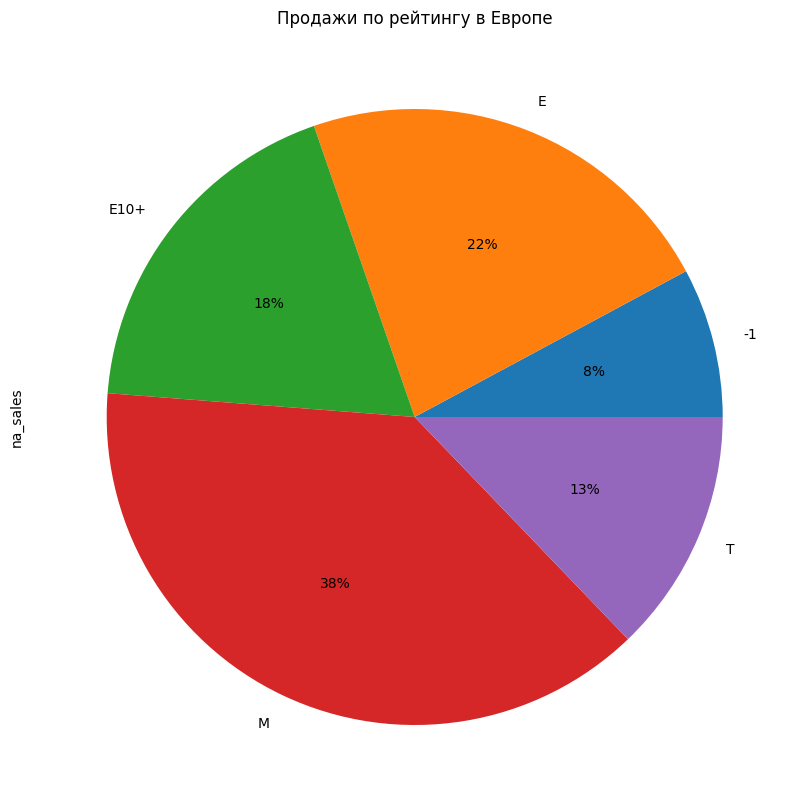

In [127]:
rt_eu = new_df.groupby('rating')['eu_sales'].mean()
rt_am.plot(kind='pie', figsize=(10, 10),autopct='%1.0f%%',title='Продажи по рейтингу в Европе')
plt.show()

Портрет пользователя Америки и Европы очень похож, тут более еще активна PS3 но в тренде уже актулаьные платформы по типу PS4 и XONE , по жанрам предпочтния так же схожи Экшон, шутеры, спорт
По рейтингам самый поплуярный М 38% далее Е 26% и Е10%

In [128]:
pl_jp = new_df.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)
display(pl_jp)

,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


Тут мы сразу видим чем рынок Японии отличается, тот самый 3ds тут очень жив , и вобще портативные консоли более популярны, а иксбокс даже в топ не вошел и то что, продукция sony сильно доминирует на рынке 

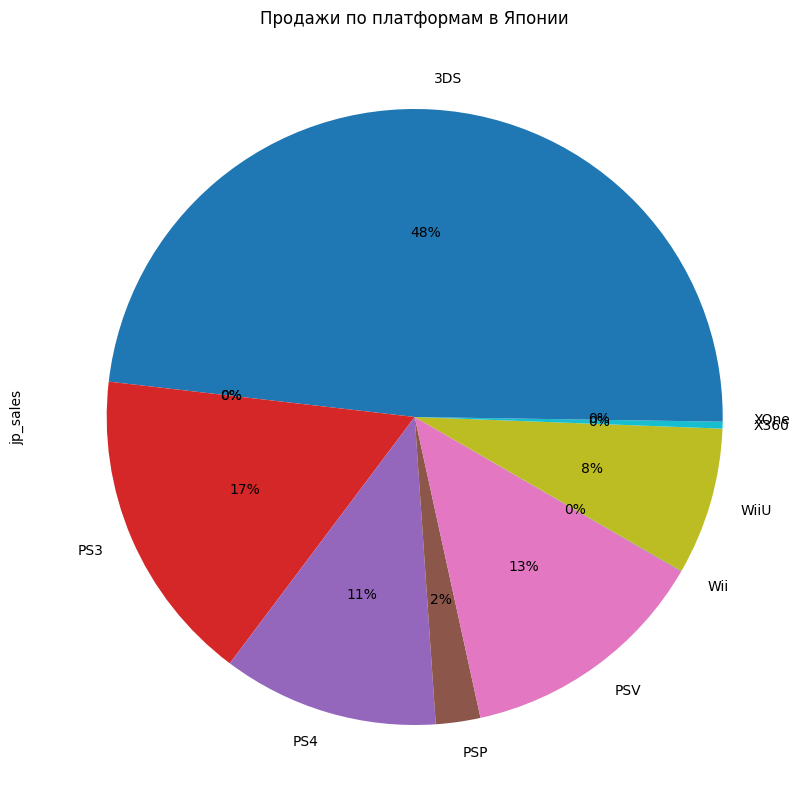

In [129]:
pl_jp = new_df.groupby('platform')['jp_sales'].sum()
pl_jp.plot(kind='pie', figsize=(10, 10),autopct='%1.0f%%',title='Продажи по платформам в Японии')
plt.show()

In [130]:
gen_jp = new_df.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)
display(gen_jp)

,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


Такое же отличие по жанрам мы видим что шутер в Японии не в почете, а РПГ доминирует 

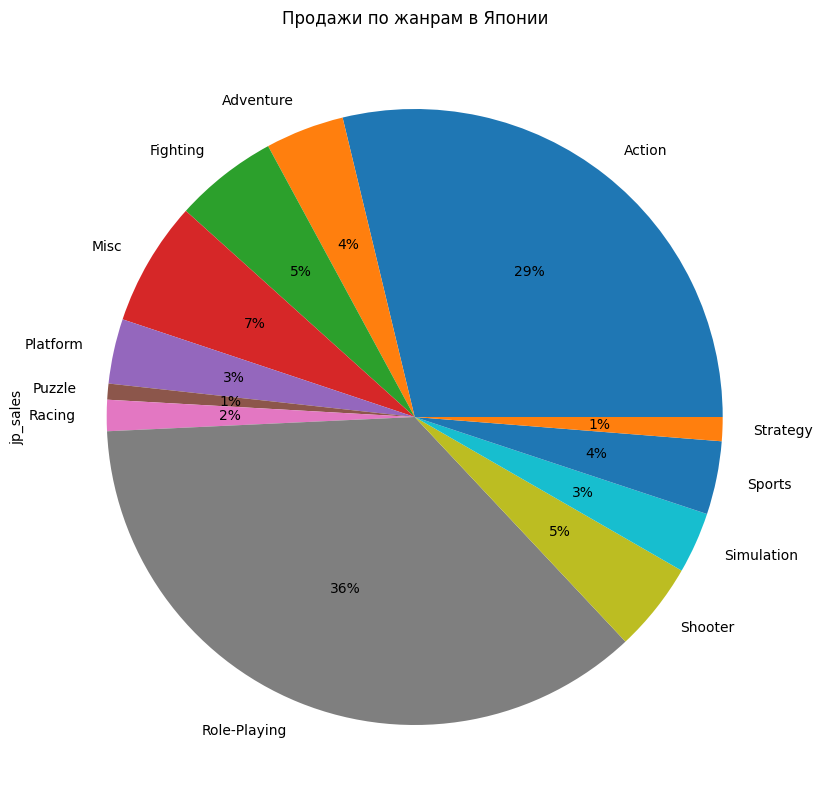

In [131]:
pl_jp = new_df.groupby('genre')['jp_sales'].sum()
pl_jp.plot(kind='pie', figsize=(10, 10),autopct='%1.0f%%',title='Продажи по жанрам в Японии')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Хорошо, что анализ визуализирован круговыми диаграммами. Но по заданию мы должны сравнивать регионы по топ-5 платформ, топ-5 жанров и рейтингу. А мы сделали анализ в другом порядке и очень сложно сравнивать регионы.<br>А вот данные не вошедшие в ТОП, как правило, суммируют и выводят отдельной группой "Другие". Тогда видна общая картина. Сделаем? Примерно вот так:</font>
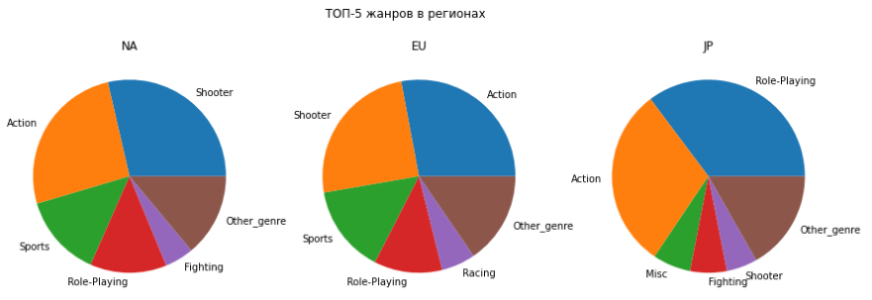

In [132]:
rt_jp = new_df.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)
display(rt_jp)

,rating,jp_sales
0,-1,85.05
4,T,20.59
1,E,15.14
3,M,14.11
2,E10+,5.89


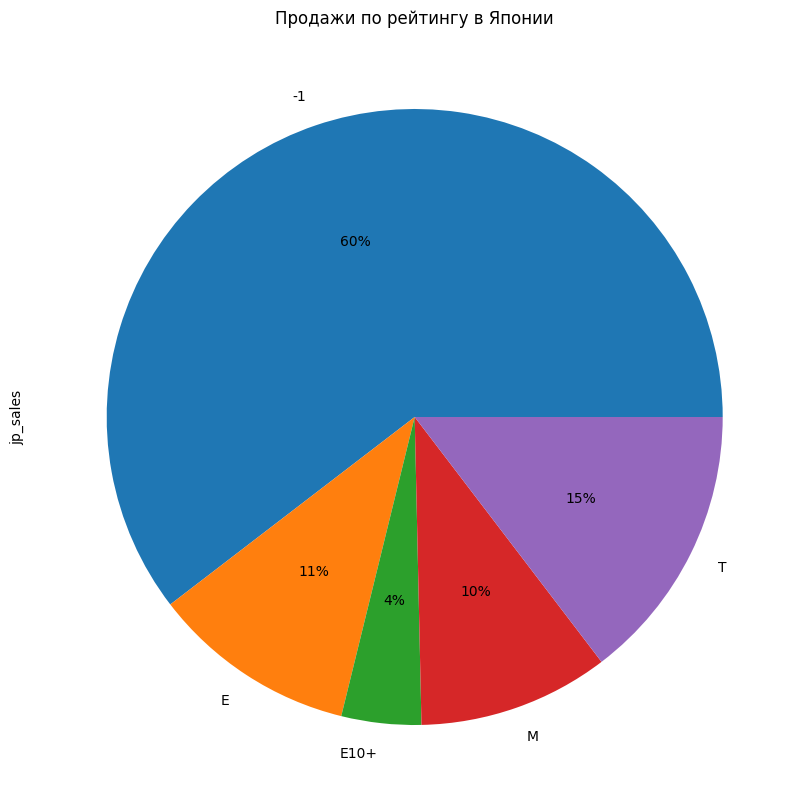

In [133]:
pl_jp = new_df.groupby('rating')['jp_sales'].sum()
pl_jp.plot(kind='pie', figsize=(10, 10),autopct='%1.0f%%',title='Продажи по рейтингу в Японии')
plt.show()

Так предпологаю так как ESRB это для оценки игр США, поэтому многие игры без оценки 

In [134]:
pl_dr = new_df.groupby('platform')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head(5)
display(pl_dr)

,platform,other_sales
4,PS4,48.35
3,PS3,26.77
10,XOne,14.27
9,X360,12.11
0,3DS,6.28


Думаю другие регионы это в основном что то будет по типу Росии, Австралии и других подобных стран, явно не Азии, то предочтнеие по жанрам так же похоже на Европу и Америку 

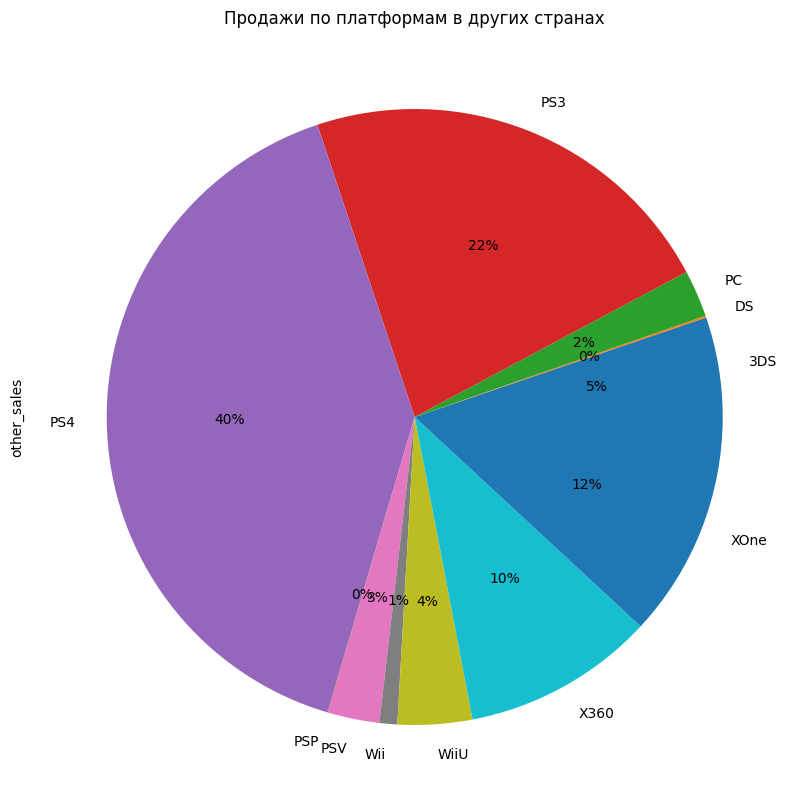

In [135]:
pl_dr = new_df.groupby('platform')['other_sales'].sum()
pl_dr.plot(kind='pie', figsize=(10, 10),autopct='%1.0f%%',title='Продажи по платформам в других странах')
plt.show()

In [136]:
gen_dr = new_df.groupby('genre')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head(5)
display(gen_dr)

,genre,other_sales
0,Action,37.20
8,Shooter,28.77
10,Sports,19.45
7,Role-Playing,11.48
3,Misc,6.09


Мне кажется, что мое предположение верное, картина очень похожа на Европу и Амреику 

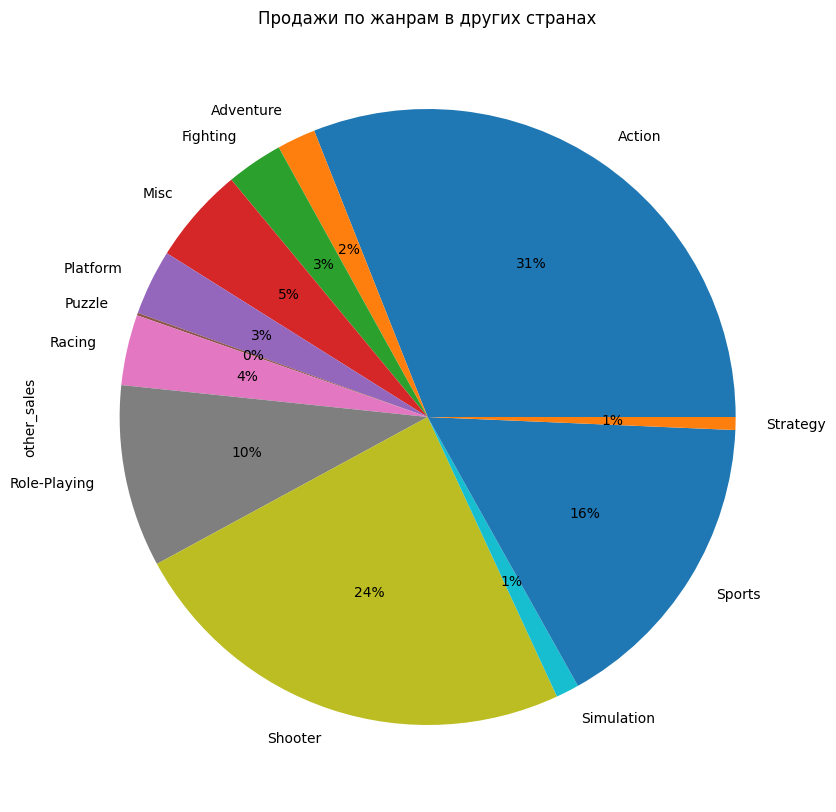

In [137]:
pl_dr = new_df.groupby('genre')['other_sales'].sum()
pl_dr.plot(kind='pie', figsize=(10, 10),autopct='%1.0f%%',title='Продажи по жанрам в других странах')
plt.show()

In [138]:
rt_dr = new_df.groupby('rating')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head(5)
display(rt_dr)

,rating,other_sales
3,M,47.04
0,-1,23.46
1,E,22.61
4,T,14.29
2,E10+,12.57


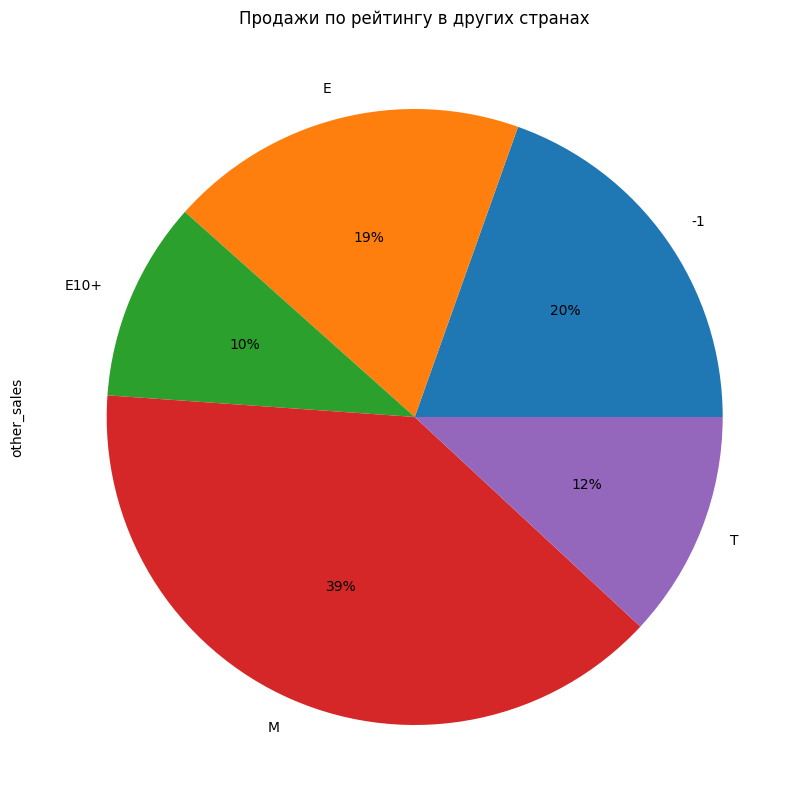

In [139]:
pl_dr = new_df.groupby('rating')['other_sales'].sum()
pl_dr.plot(kind='pie', figsize=(10, 10),autopct='%1.0f%%',title='Продажи по рейтингу в других странах')
plt.show()

### 4.1 Выводы

1. Самые популярные плтаформы PS4 и Xone на рынке Японии выходит в топ 3DS но это нишивая история, так же как сейчас нинтендо свич, в Росии он не очень популярен в отличии от той же PS 
2. Жанры, в оснвном лидируют эшкон, шутер, спорт, на рынке Японии популярно РПГ 
3. Рейтинг самые поплуряный у нас М от 17 лет, в Японии оценок нет так как оценки ESRB созданы для рынка США, но взаимосвязь между продажами я честно не вижу здесь, я знаю, что очень многие хотят получить рейтинг Е для подростков так как продукт можно распостронить на большию аудиторию, но тогда надо урезать жестокость и сцены секусального характера

## Шаг 5. Проверим гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы. Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

H₀ - средние пользовательские рейтинги платформ Xbox One и PC равны H₁ - средние пользовательские рейтинги платформ Xbox One и PC не равны

alpha = .05

#зададим критический уровень статистической значимости

In [140]:
alpha =.05

In [141]:
xone = new_df.query('platform == "XOne"')
pc = new_df.query('platform == "PC"')
# Уберем заглушки 

In [142]:
# Комментарий ревьюера
len(new_df.query('platform=="XOne" and user_score!=-1 \
                 and critic_score!=-1')), len(new_df.query('platform=="XOne" and user_score!=-1'))

(165, 182)

In [143]:
results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг платформы Xbox One -', xone['user_score'].mean().round(2))
print('Cредний пользовательский рейтинг платформы PC -', pc['user_score'].mean().round(2))

p-значение: 0.2011139990078361
Не получилось отвергнуть нулевую гипотезу

Cредний пользовательский рейтинг платформы Xbox One - 4.54
Cредний пользовательский рейтинг платформы PC - 4.96


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H₀ - средние пользовательские рейтинги жанров Action и Sports равны H₁ - средние пользовательские рейтинги жанров Action и Sports не равны

In [144]:
action = new_df.query('genre == "Action"')
sports = new_df.query('genre == "Sports"')
# Уберем заглушки 

In [145]:
alpha = .05

#зададим критический уровень статистической значимости

In [146]:
results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг жанра Action -', action['user_score'].mean().round(2))
print('Cредний пользовательский рейтинг жанра Sports -', sports['user_score'].mean().round(2))

p-значение: 0.02193663336455412
Отвергаем нулевую гипотезу

Cредний пользовательский рейтинг жанра Action - 2.98
Cредний пользовательский рейтинг жанра Sports - 3.66


Вывод: Проверили две гипотезы:

первую гипотезу отвергнуть не смогли средние пользовательские рейтинги платформ Xbox One и PC равны;

вторую гипотезу отвергли средние пользовательские рейтинги жанров Action и Sports равны

Пользовательский рейтинг платформ XOne и PС практически одинаковый, а средние пользовательские рейтинги жанров Action и Sports разнный.

## Шаг 6. Общий вывод

В ходе работы познакомились с данными, провели предобработку, преобразовали данные в нужные типы, заполнили пропуски где это было уместно, посчитали общие продажи, выявили самые актуальные платформы,жанры а так же проверили взаимосвязь между продажами и оценками пользователей и критиков.
По актуальным данным среди платформ  лидируют у нас PS4 PS3 Xone 3DS (но тут свой локальный рынок) X360 WiiU, но часть из этих платформ уже заканчивает свой цикл разработки пожтому нам нужно делать ставку на самые актуальные и прибыльные платформы PS4 Xone
На примере PS4 проверили влияют ли оценки пользователей и критиков на продажи и видно, что отзывы критиков влияют боьше, чем отзывы пользователей (значит надо подкупить критиков - шутка), так же на примере других платформ проверили эту теорию, в целом к ризывам критиков доверия больше, только на некоторых платформах (WiiU) оценки пользователей имели почти такое же влияние
Сама большая прибиль идет при оценки кртиков от 70 и выше (надо подкупать точно). По медианым продажам лидирует Шутеры, а по суммарным Экшон, самые не прибыльные это Позлы, адвенчура, стратегии но там и разработка дешевле.
По портретам пользователей выделяется только рынок Японии
В Америке лидирует Ps4 xone x360 самые поплуярные жанры шутеры,экшон, спорт, рейтинги М,Е,Е10+
В Европе лидирует Ps4 Xone PS3 жанры Экшон,Шутеры, спорт, рейтинги М и Е 
В Японии лидирует Sony PS4 PSV 3DS портативные консоли там гараздо популярнее, и так же по жанрам там больше в почете РПГ и Экшон, рейтинги T и E но как мы знаем там ESRB оцнивает далеко не все игры 
В других странах портет так же похож на Европу и Америку лидируют платформы - PS4, XOne, PS3 Самые популярные жанры - Шутеры, Экшон, Спорт. Самые большие продажи у рейтингов - М(для взрослых 18+),E (для всех) и T (для подростков)
Для планирования компании в Америке,Европе и други странах нужно делать ставку на актуальные платформы по типу PS4 Xone и еще чучуть заработать на актуальных старичках по типу PS3 X360 
По жанрам делать акцент на Шутеры, Экшон, Спорт а так же не забыть получить хорошие оцнеки у критиков, по рейтингам внимание на М и Е
В Японии ставку надо делать на PS в целом и портативные консоли там они популярнее по типу 3ds PSV по жанрам на РПГ и экшон, ретинг Т и Е.
В целом все ) 